# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_realistic_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1763260873_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1141113940_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/691691381_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/264978436_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1088417975_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.4.json
Using /home/ashinde/PhD/CaffineB

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1763260873_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, failure), (ConnObs, inactive)]
2:[(ActionResult, success), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, inactive)]


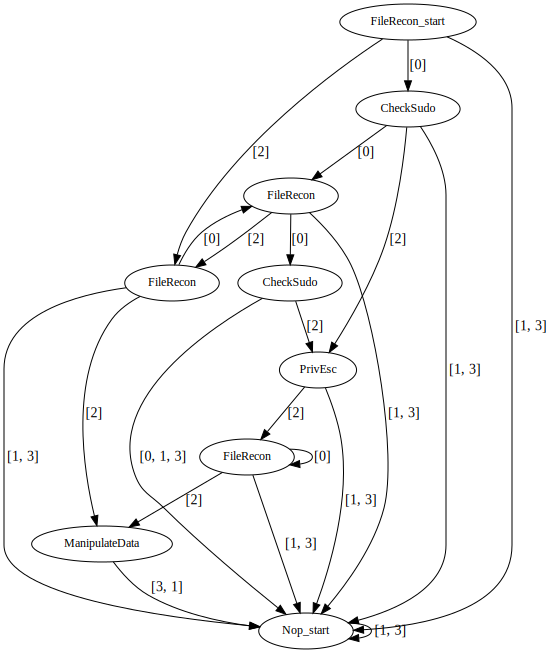

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1141113940_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, failure), (ConnObs, inactive)]
2:[(ActionResult, success), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, inactive)]


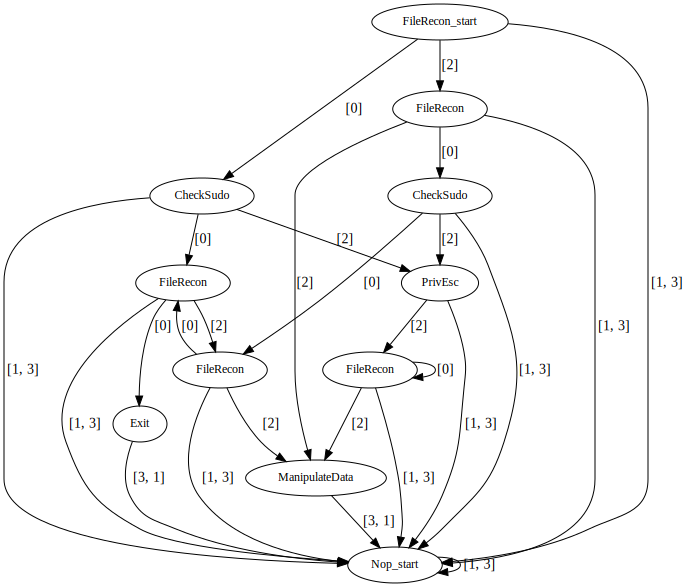

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/691691381_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


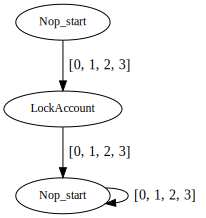

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/264978436_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


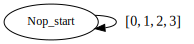

Displaying /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/1088417975_attl2_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, inactive)]
1:[(ActionResult, success), (ConnObs, inactive)]
2:[(ActionResult, failure), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, active)]


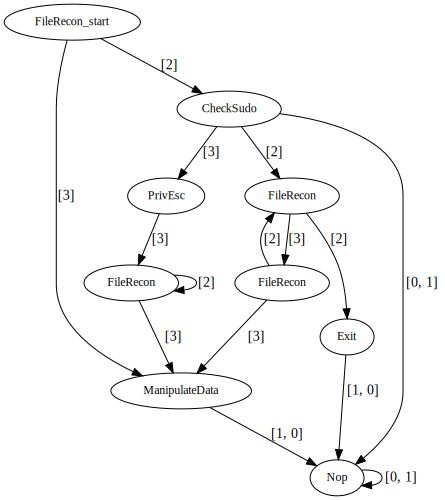

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_realistic_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,failure,active
1,0.500000,0.500000,success,active
2,0.333333,0.666667,success,active
3,0.333333,0.666667,success,active
4,0.333333,0.666667,failure,inactive
5,0.333333,0.666667,success,inactive
6,0.333333,0.666667,success,inactive
7,0.333333,0.666667,success,inactive
8,0.333333,0.666667,failure,inactive
9,0.333333,0.666667,failure,inactive


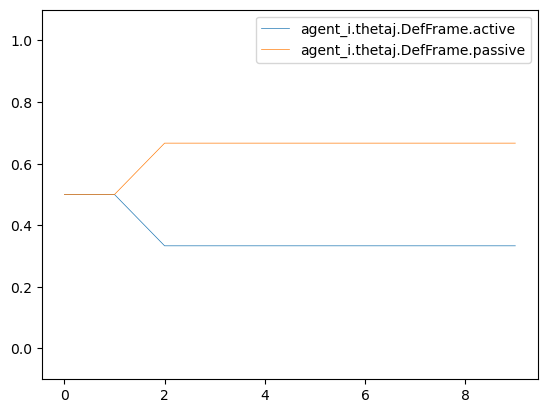

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_write
1,1.0,none
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,su_login
6,1.0,none
7,1.0,file_enum
8,1.0,none
9,1.0,none


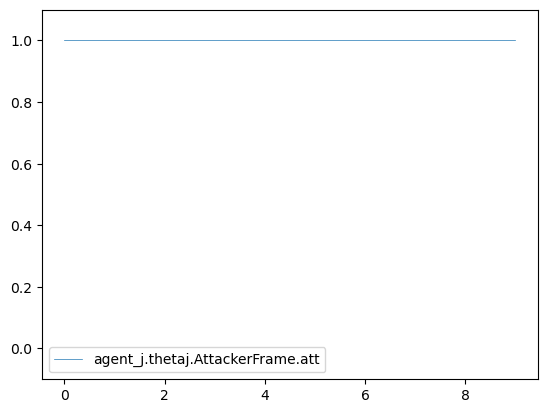

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


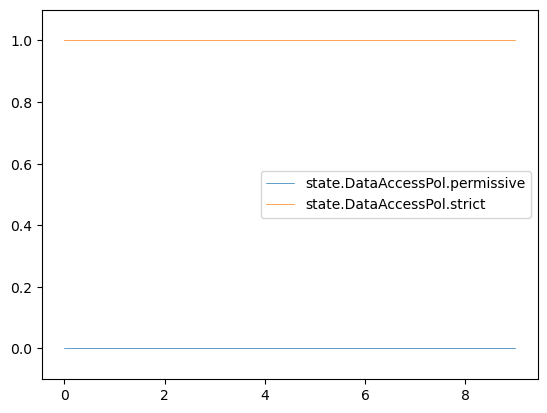

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,failure,active
1,0.224138,0.775862,CheckSudo,Nop,success,active
2,0.224138,0.775862,PrivEsc,Nop,success,active
3,0.224138,0.775862,FileRecon,Nop,success,active
4,0.235537,0.764463,ManipulateData,Nop,failure,inactive
5,0.235537,0.764463,Nop,Nop,success,inactive
6,0.235537,0.764463,Nop,Nop,success,inactive
7,0.235537,0.764463,Nop,Nop,success,inactive
8,0.235537,0.764463,Nop,Nop,failure,inactive
9,0.235537,0.764463,Nop,Nop,failure,inactive


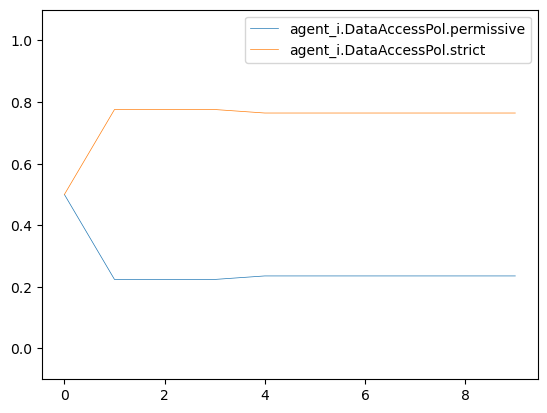

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_write
1,0.500000,0.500000,Nop,CheckSudo,none
2,0.416376,0.583624,Nop,PrivEsc,su_login
3,0.285714,0.714286,Nop,FileRecon,file_enum
4,0.235567,0.764433,Nop,ManipulateData,file_write
5,0.236440,0.763560,Nop,Nop,su_login
6,0.236440,0.763560,Nop,Nop,none
7,0.236908,0.763092,Nop,Nop,file_enum
8,0.236886,0.763114,Nop,Nop,none
9,0.236908,0.763092,Nop,Nop,none


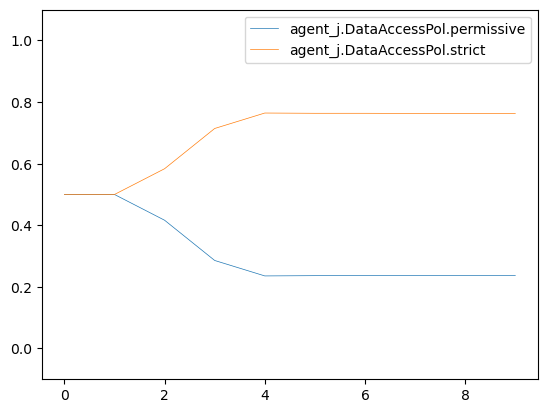

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


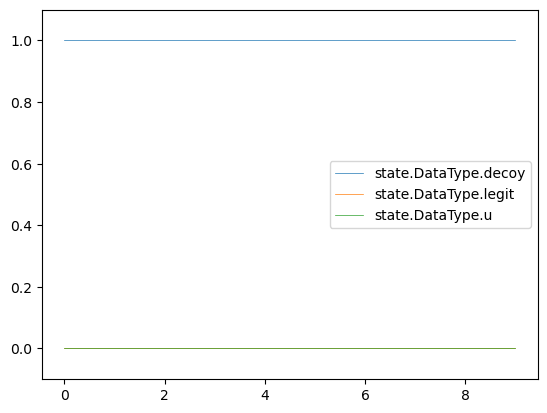

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,0.0,FileRecon,Nop,failure,active
1,0.500000,0.500000,0.0,CheckSudo,Nop,success,active
2,0.666667,0.333333,0.0,PrivEsc,Nop,success,active
3,0.666667,0.333333,0.0,FileRecon,Nop,success,active
4,0.666667,0.333333,0.0,ManipulateData,Nop,failure,inactive
5,0.666667,0.333333,0.0,Nop,Nop,success,inactive
6,0.666667,0.333333,0.0,Nop,Nop,success,inactive
7,0.666667,0.333333,0.0,Nop,Nop,success,inactive
8,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
9,0.666667,0.333333,0.0,Nop,Nop,failure,inactive


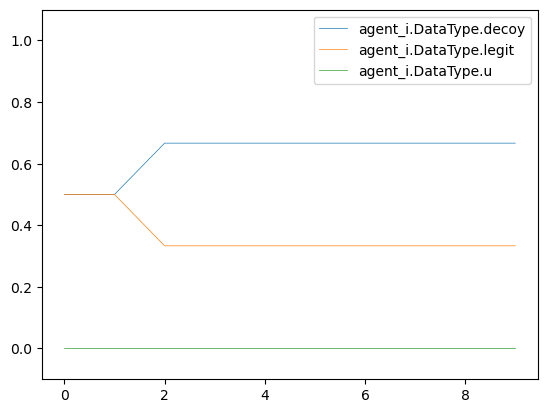

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_write
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


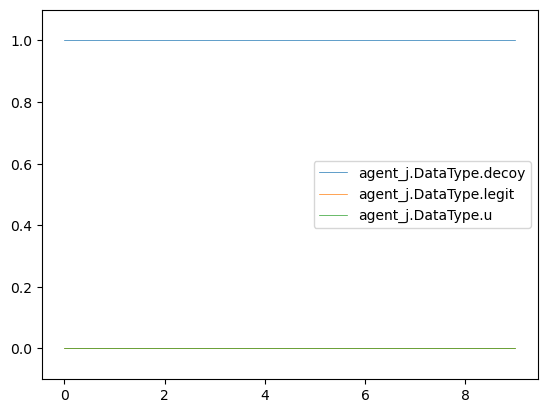

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


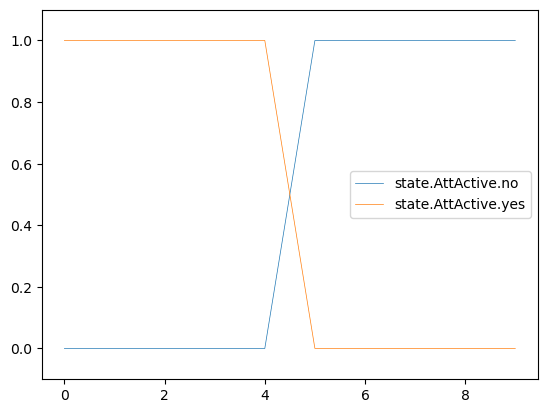

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,failure,inactive
5,1.0,0.0,Nop,Nop,success,inactive
6,1.0,0.0,Nop,Nop,success,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,failure,inactive


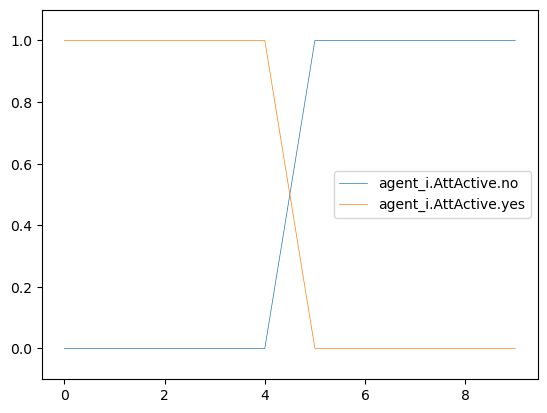

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_write
1,0.500000,0.500000,Nop,CheckSudo,none
2,0.609756,0.390244,Nop,PrivEsc,su_login
3,0.204699,0.795301,Nop,FileRecon,file_enum
4,0.035511,0.964489,Nop,ManipulateData,file_write
5,0.955064,0.044936,Nop,Nop,su_login
6,0.990597,0.009403,Nop,Nop,none
7,0.999735,0.000265,Nop,Nop,file_enum
8,0.999631,0.000369,Nop,Nop,none
9,0.999990,0.000010,Nop,Nop,none


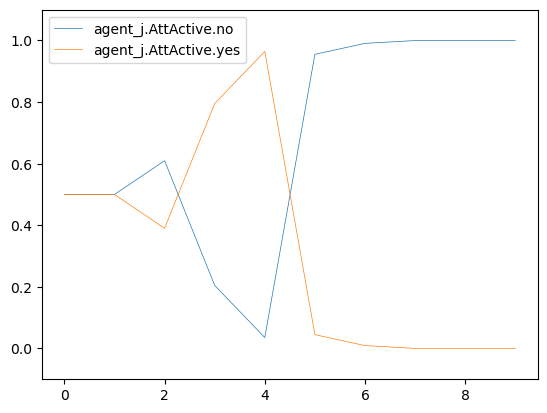

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


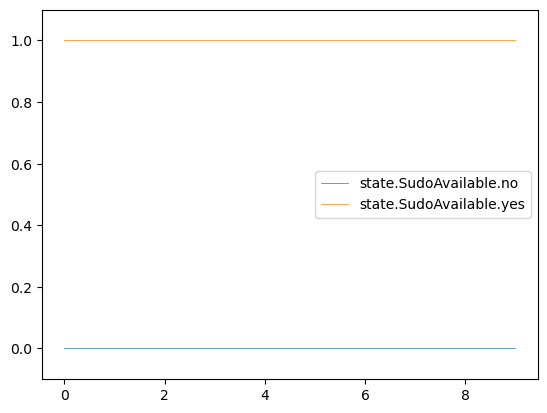

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,failure,active
1,0.5,0.5,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,failure,inactive
5,0.0,1.0,Nop,Nop,success,inactive
6,0.0,1.0,Nop,Nop,success,inactive
7,0.0,1.0,Nop,Nop,success,inactive
8,0.0,1.0,Nop,Nop,failure,inactive
9,0.0,1.0,Nop,Nop,failure,inactive


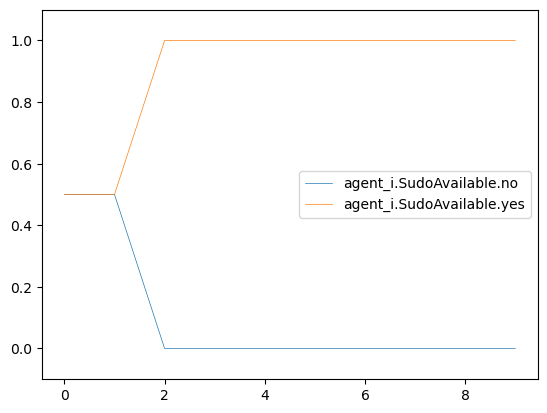

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_write
1,0.0,1.0,Nop,CheckSudo,none
2,0.0,1.0,Nop,PrivEsc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,su_login
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,file_enum
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


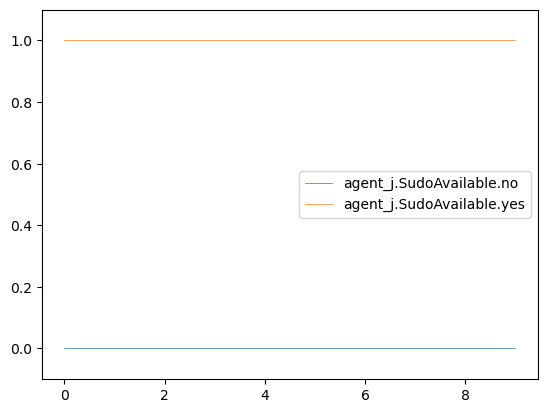

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


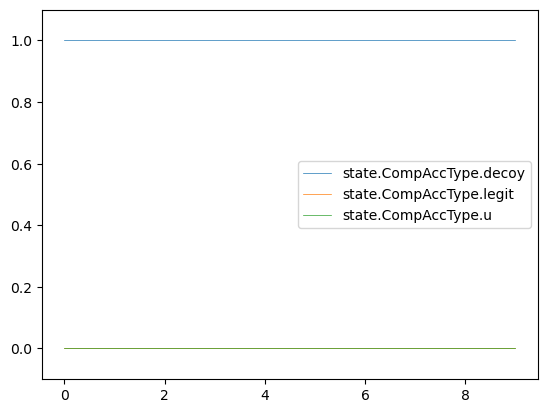

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,0.0,FileRecon,Nop,failure,active
1,0.5,0.5,0.0,CheckSudo,Nop,success,active
2,0.5,0.5,0.0,PrivEsc,Nop,success,active
3,0.5,0.5,0.0,FileRecon,Nop,success,active
4,0.5,0.5,0.0,ManipulateData,Nop,failure,inactive
5,0.5,0.5,0.0,Nop,Nop,success,inactive
6,0.5,0.5,0.0,Nop,Nop,success,inactive
7,0.5,0.5,0.0,Nop,Nop,success,inactive
8,0.5,0.5,0.0,Nop,Nop,failure,inactive
9,0.5,0.5,0.0,Nop,Nop,failure,inactive


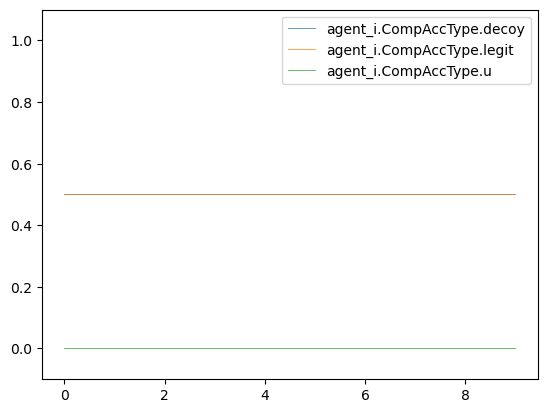

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_write
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,file_enum
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


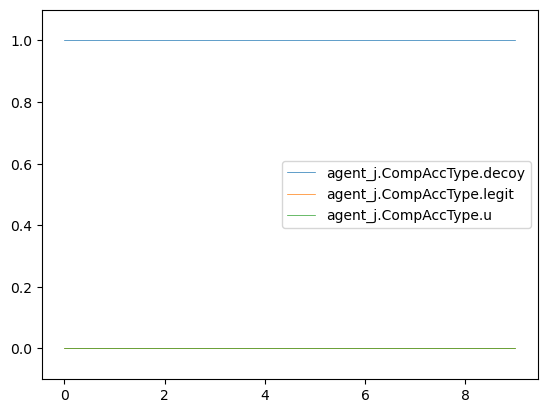

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,FileRecon,Nop
1,1.0,0.0,CheckSudo,Nop
2,1.0,0.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


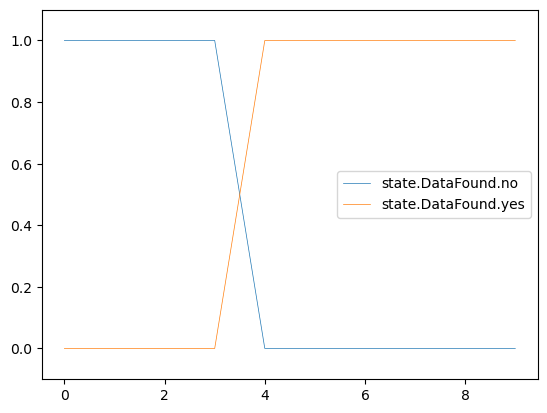

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,failure,active
1,0.931034,0.068966,CheckSudo,Nop,success,active
2,0.931035,0.068966,PrivEsc,Nop,success,active
3,0.931035,0.068966,FileRecon,Nop,success,active
4,0.024793,0.975207,ManipulateData,Nop,failure,inactive
5,0.024793,0.975207,Nop,Nop,success,inactive
6,0.024793,0.975207,Nop,Nop,success,inactive
7,0.024793,0.975207,Nop,Nop,success,inactive
8,0.024793,0.975207,Nop,Nop,failure,inactive
9,0.024793,0.975207,Nop,Nop,failure,inactive


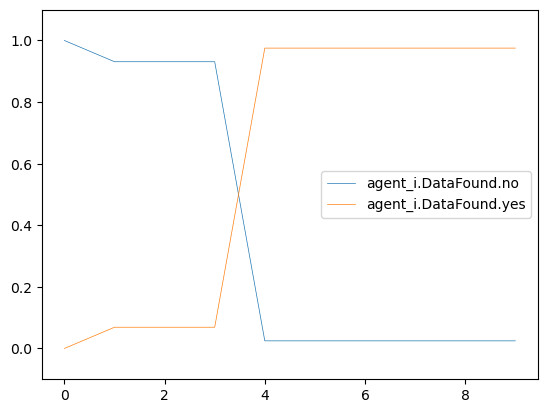

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_write
1,0.800000,0.200000,Nop,CheckSudo,none
2,0.943554,0.056446,Nop,PrivEsc,su_login
3,0.935004,0.064996,Nop,FileRecon,file_enum
4,0.213567,0.786433,Nop,ManipulateData,file_write
5,0.035943,0.964057,Nop,Nop,su_login
6,0.031567,0.968433,Nop,Nop,none
7,0.030742,0.969258,Nop,Nop,file_enum
8,0.030744,0.969256,Nop,Nop,none
9,0.030715,0.969286,Nop,Nop,none


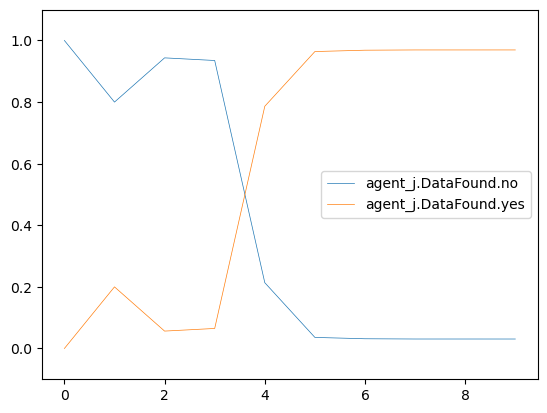

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


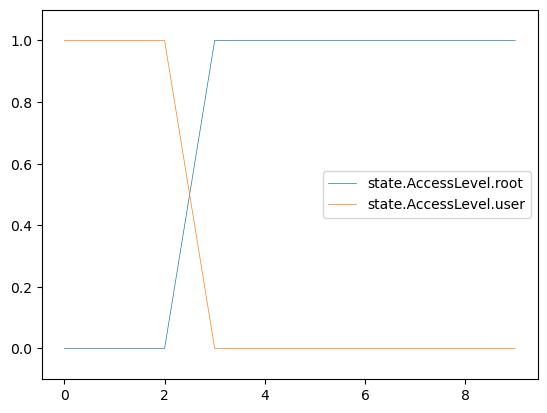

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,1.0,0.0,FileRecon,Nop,success,active
4,1.0,0.0,ManipulateData,Nop,failure,inactive
5,1.0,0.0,Nop,Nop,success,inactive
6,1.0,0.0,Nop,Nop,success,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,failure,inactive


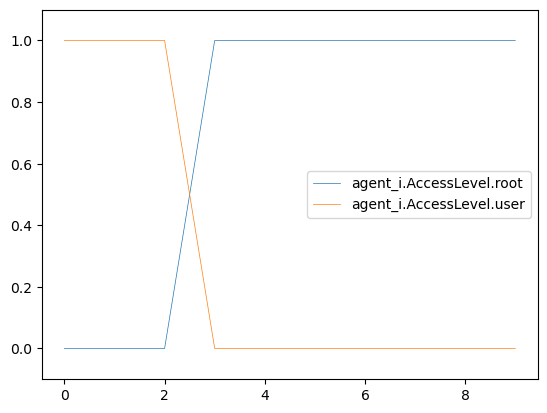

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_write
1,0.000000,1.000000,Nop,CheckSudo,none
2,0.000000,1.000000,Nop,PrivEsc,su_login
3,0.792969,0.207031,Nop,FileRecon,file_enum
4,0.962953,0.037047,Nop,ManipulateData,file_write
5,0.991914,0.008086,Nop,Nop,su_login
6,0.991914,0.008086,Nop,Nop,none
7,0.991893,0.008107,Nop,Nop,file_enum
8,0.991894,0.008106,Nop,Nop,none
9,0.991893,0.008107,Nop,Nop,none


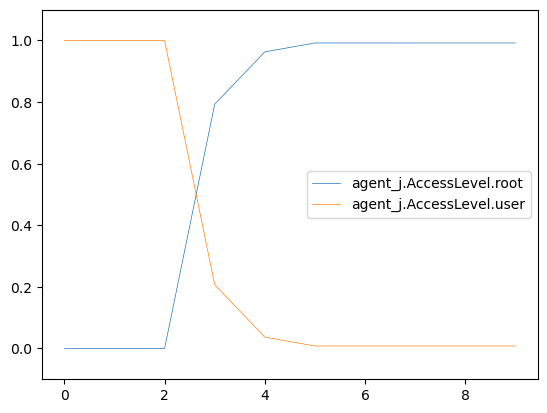

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,failure,active
1,0.500000,0.500000,success,active
2,0.333333,0.666667,success,active
3,0.333333,0.666667,success,active
4,0.333333,0.666667,success,inactive
5,0.333333,0.666667,failure,inactive
6,0.333333,0.666667,failure,inactive
7,0.333333,0.666667,success,inactive
8,0.333333,0.666667,failure,inactive
9,0.333333,0.666667,failure,inactive


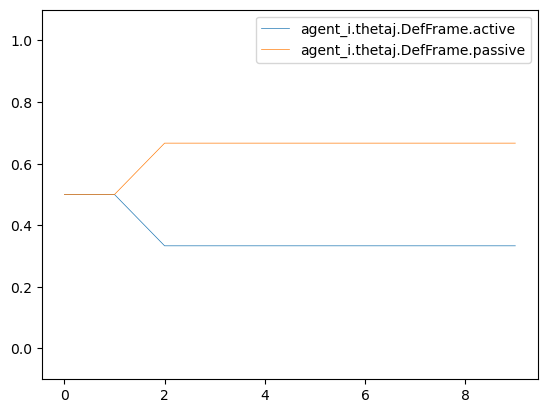

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,none
2,1.0,su_login
3,1.0,file_enum
4,1.0,file_write
5,1.0,none
6,1.0,none
7,1.0,none
8,1.0,none
9,1.0,none


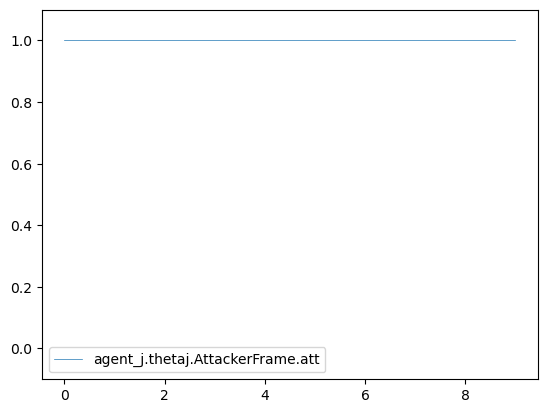

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


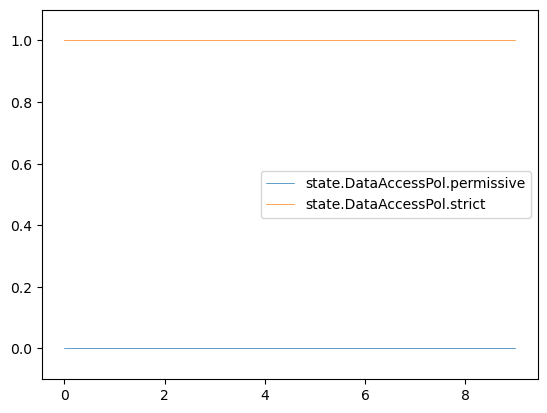

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,failure,active
1,0.224138,0.775862,CheckSudo,Nop,success,active
2,0.224138,0.775862,PrivEsc,Nop,success,active
3,0.224138,0.775862,FileRecon,Nop,success,active
4,0.235537,0.764463,ManipulateData,Nop,success,inactive
5,0.235537,0.764463,Nop,Nop,failure,inactive
6,0.235537,0.764463,Nop,Nop,failure,inactive
7,0.235537,0.764463,Nop,Nop,success,inactive
8,0.235537,0.764463,Nop,Nop,failure,inactive
9,0.235537,0.764463,Nop,Nop,failure,inactive


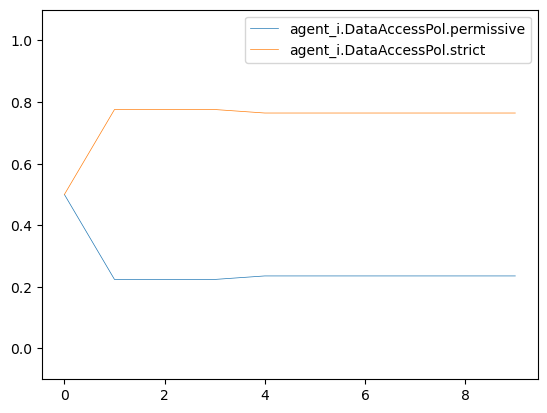

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.500000,0.500000,Nop,CheckSudo,none
2,0.324817,0.675182,Nop,PrivEsc,su_login
3,0.242627,0.757373,Nop,FileRecon,file_enum
4,0.227658,0.772342,Nop,ManipulateData,file_write
5,0.235000,0.765000,Nop,Nop,none
6,0.236812,0.763188,Nop,Nop,none
7,0.236885,0.763115,Nop,Nop,none
8,0.236887,0.763113,Nop,Nop,none
9,0.236887,0.763113,Nop,Nop,none


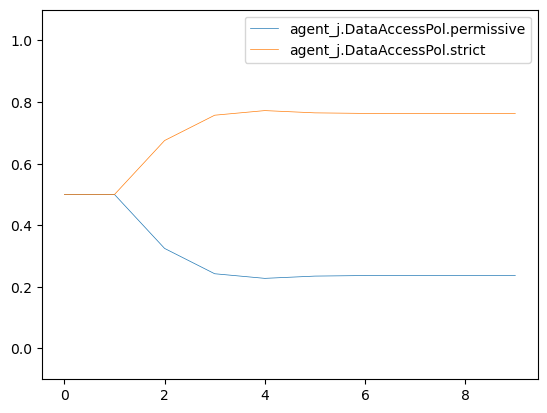

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


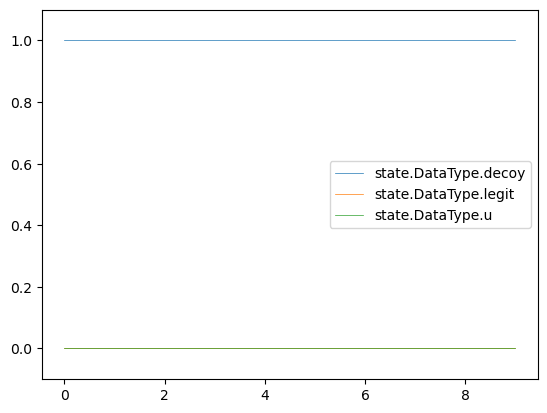

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,0.0,FileRecon,Nop,failure,active
1,0.500000,0.500000,0.0,CheckSudo,Nop,success,active
2,0.666667,0.333333,0.0,PrivEsc,Nop,success,active
3,0.666667,0.333333,0.0,FileRecon,Nop,success,active
4,0.666667,0.333333,0.0,ManipulateData,Nop,success,inactive
5,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
6,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
7,0.666667,0.333333,0.0,Nop,Nop,success,inactive
8,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
9,0.666667,0.333333,0.0,Nop,Nop,failure,inactive


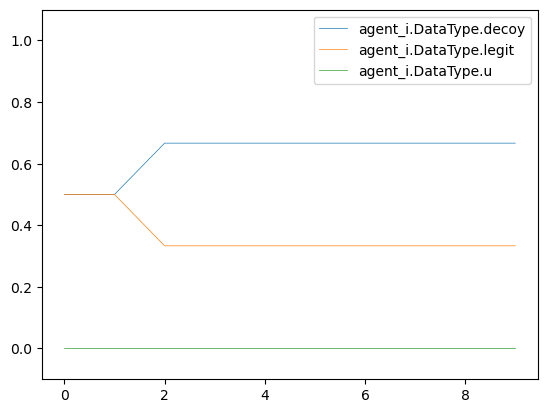

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


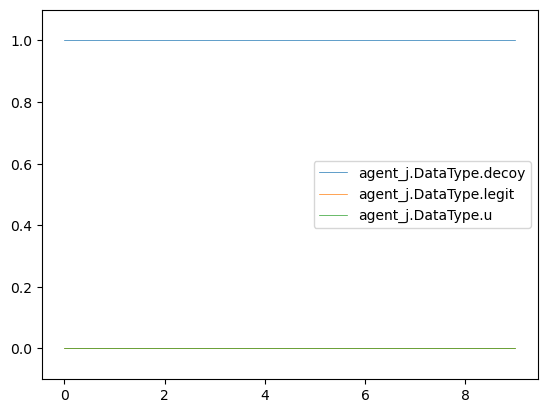

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


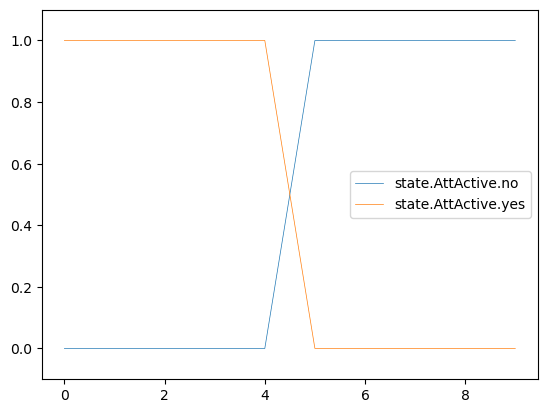

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,failure,inactive


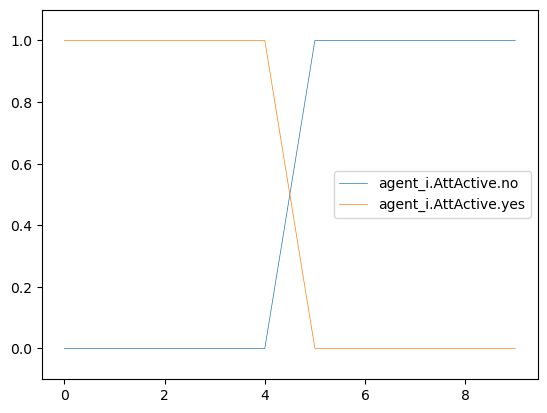

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,5.000000e-01,Nop,FileRecon,file_enum
1,0.125000,8.750001e-01,Nop,CheckSudo,none
2,0.182482,8.175182e-01,Nop,PrivEsc,su_login
3,0.044786,9.552146e-01,Nop,FileRecon,file_enum
4,0.006662,9.933378e-01,Nop,ManipulateData,file_write
5,0.954818,4.518142e-02,Nop,Nop,none
6,0.998572,1.427675e-03,Nop,Nop,none
7,0.999957,4.257822e-05,Nop,Nop,none
8,0.999998,1.629422e-06,Nop,Nop,none
9,1.000000,5.327351e-08,Nop,Nop,none


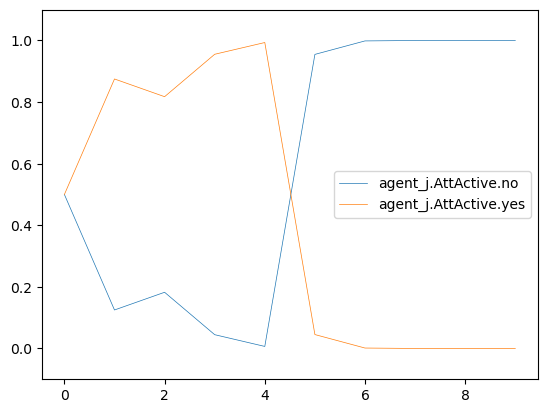

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


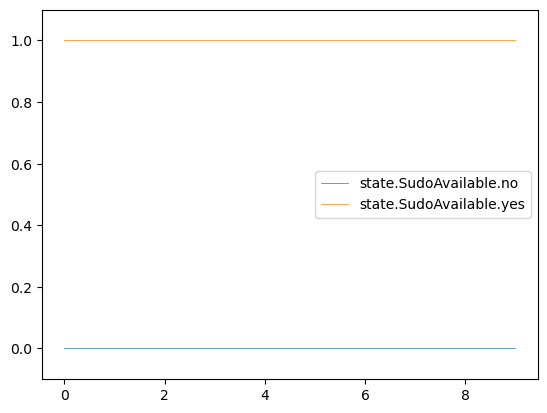

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,failure,active
1,0.5,0.5,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,0.0,1.0,Nop,Nop,failure,inactive
6,0.0,1.0,Nop,Nop,failure,inactive
7,0.0,1.0,Nop,Nop,success,inactive
8,0.0,1.0,Nop,Nop,failure,inactive
9,0.0,1.0,Nop,Nop,failure,inactive


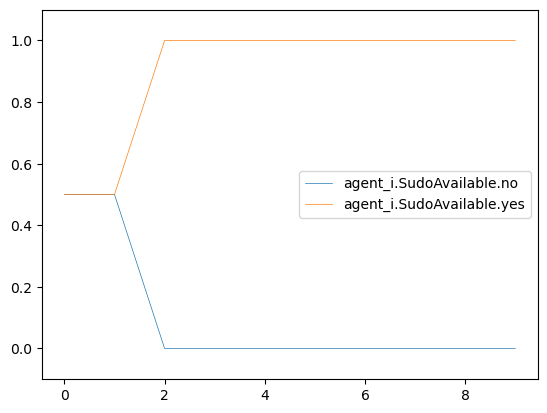

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,CheckSudo,none
2,0.0,1.0,Nop,PrivEsc,su_login
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,none
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


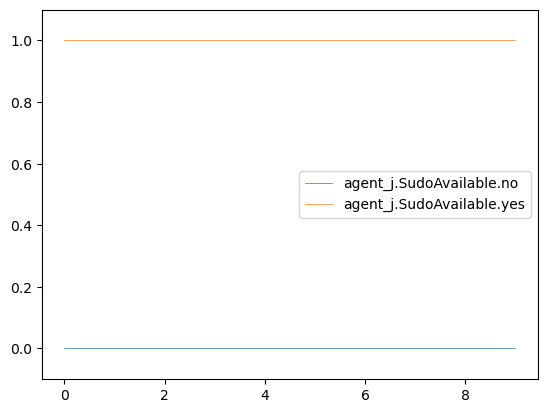

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


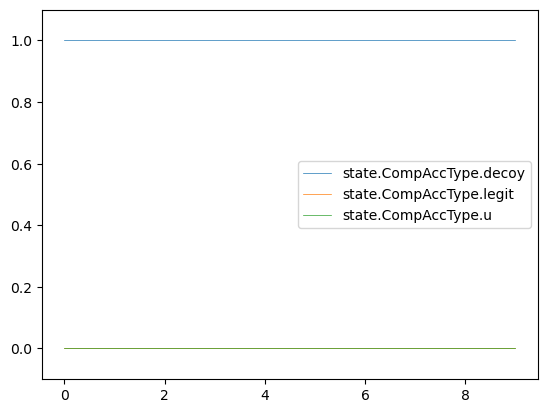

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,0.0,FileRecon,Nop,failure,active
1,0.5,0.5,0.0,CheckSudo,Nop,success,active
2,0.5,0.5,0.0,PrivEsc,Nop,success,active
3,0.5,0.5,0.0,FileRecon,Nop,success,active
4,0.5,0.5,0.0,ManipulateData,Nop,success,inactive
5,0.5,0.5,0.0,Nop,Nop,failure,inactive
6,0.5,0.5,0.0,Nop,Nop,failure,inactive
7,0.5,0.5,0.0,Nop,Nop,success,inactive
8,0.5,0.5,0.0,Nop,Nop,failure,inactive
9,0.5,0.5,0.0,Nop,Nop,failure,inactive


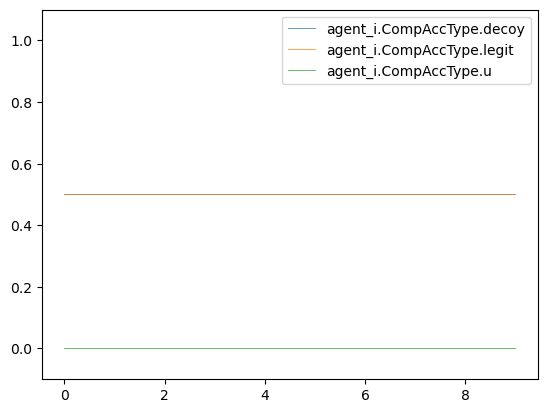

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,none
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


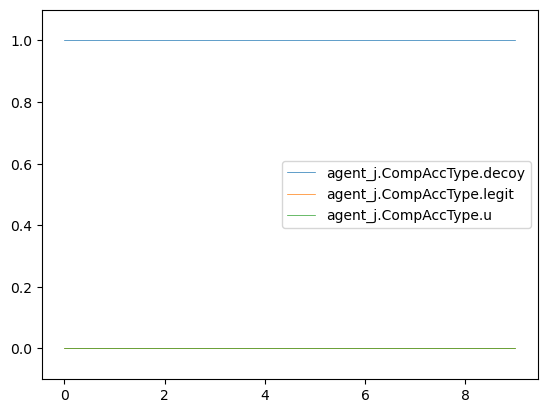

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,FileRecon,Nop
1,1.0,0.0,CheckSudo,Nop
2,1.0,0.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


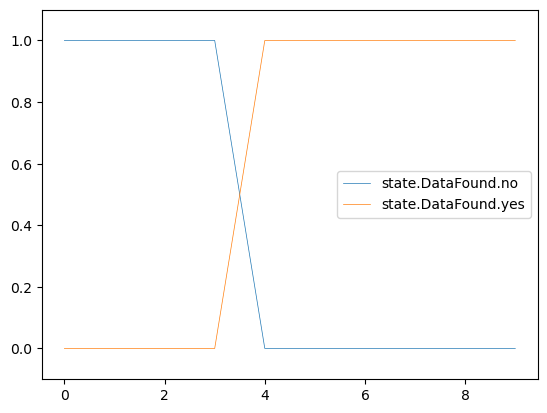

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,failure,active
1,0.931034,0.068966,CheckSudo,Nop,success,active
2,0.931035,0.068966,PrivEsc,Nop,success,active
3,0.931035,0.068966,FileRecon,Nop,success,active
4,0.024793,0.975207,ManipulateData,Nop,success,inactive
5,0.024793,0.975207,Nop,Nop,failure,inactive
6,0.024793,0.975207,Nop,Nop,failure,inactive
7,0.024793,0.975207,Nop,Nop,success,inactive
8,0.024793,0.975207,Nop,Nop,failure,inactive
9,0.024793,0.975207,Nop,Nop,failure,inactive


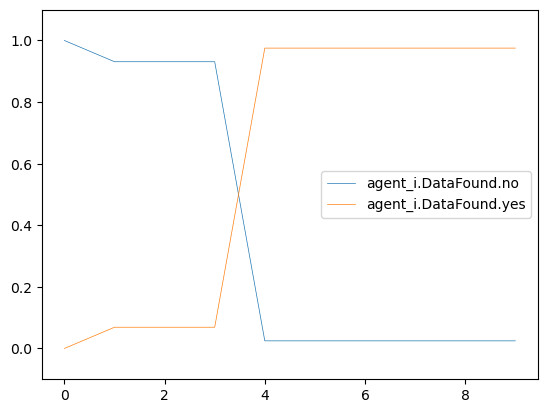

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,0.650000,0.350000,Nop,CheckSudo,none
2,0.881752,0.118248,Nop,PrivEsc,su_login
3,0.921936,0.078064,Nop,FileRecon,file_enum
4,0.190044,0.809956,Nop,ManipulateData,file_write
5,0.030677,0.969323,Nop,Nop,none
6,0.025810,0.974190,Nop,Nop,none
7,0.025663,0.974337,Nop,Nop,none
8,0.025657,0.974343,Nop,Nop,none
9,0.025657,0.974343,Nop,Nop,none


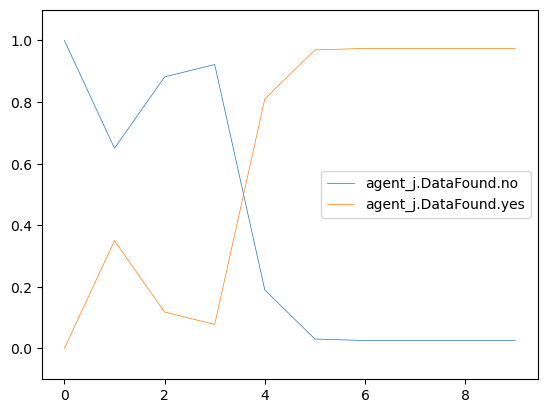

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


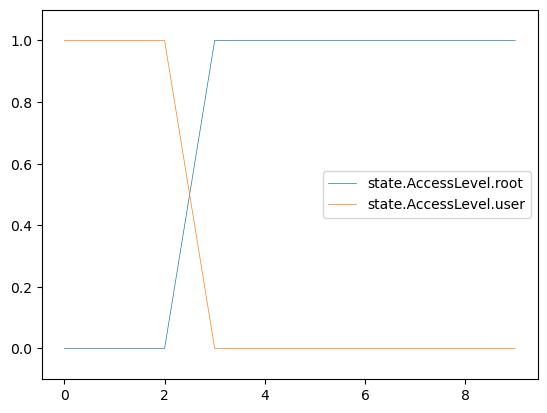

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,1.0,0.0,FileRecon,Nop,success,active
4,1.0,0.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,failure,inactive


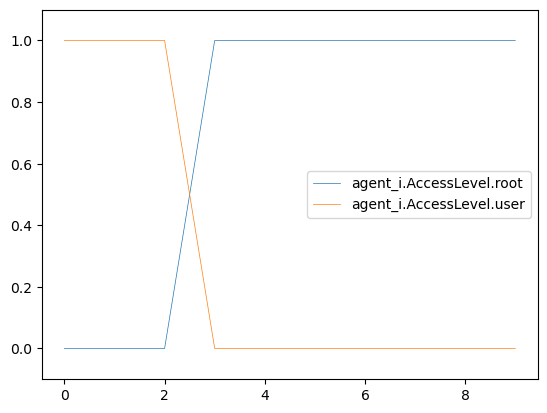

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,CheckSudo,none
2,0.000000,1.000000,Nop,PrivEsc,su_login
3,0.952413,0.047587,Nop,FileRecon,file_enum
4,0.991756,0.008244,Nop,ManipulateData,file_write
5,0.997332,0.002668,Nop,Nop,none
6,0.997245,0.002755,Nop,Nop,none
7,0.997271,0.002729,Nop,Nop,none
8,0.997271,0.002729,Nop,Nop,none
9,0.997271,0.002729,Nop,Nop,none


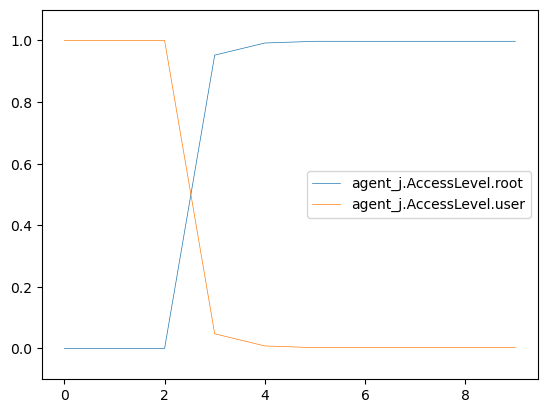

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,failure,active
1,0.500000,0.500000,success,active
2,0.333333,0.666667,success,active
3,0.333333,0.666667,failure,active
4,0.333333,0.666667,success,active
5,0.333333,0.666667,failure,inactive
6,0.333333,0.666667,failure,inactive
7,0.333333,0.666667,success,inactive
8,0.333333,0.666667,failure,inactive
9,0.333333,0.666667,success,inactive


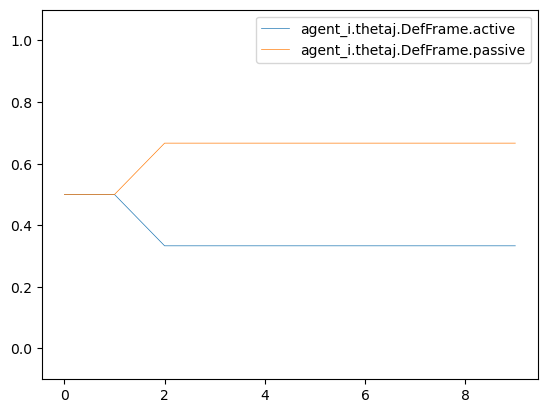

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,none
2,1.0,su_login
3,1.0,file_write
4,1.0,none
5,1.0,file_enum
6,1.0,su_login
7,1.0,none
8,1.0,none
9,1.0,file_write


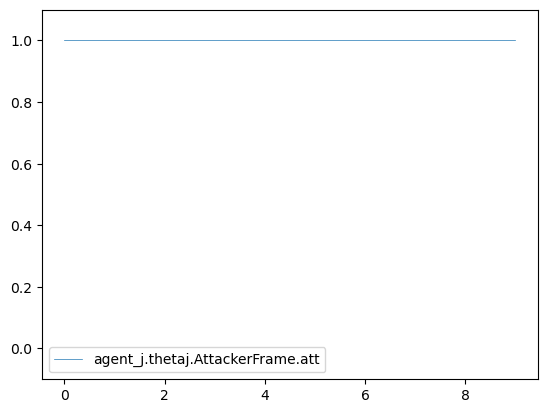

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,FileRecon,Nop
5,0.0,1.0,ManipulateData,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


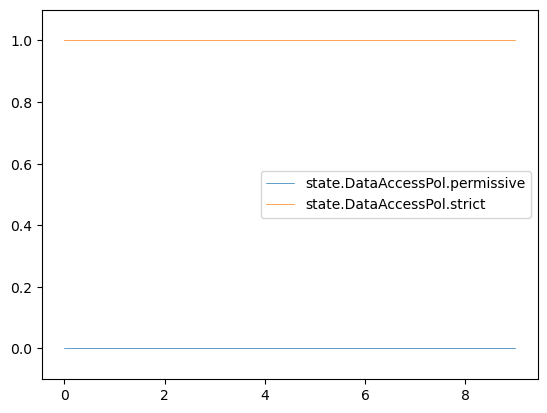

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,failure,active
1,0.224138,0.775862,CheckSudo,Nop,success,active
2,0.224138,0.775862,PrivEsc,Nop,success,active
3,0.224138,0.775862,FileRecon,Nop,failure,active
4,0.189751,0.810249,FileRecon,Nop,success,active
5,0.192889,0.807111,ManipulateData,Nop,failure,inactive
6,0.192889,0.807111,Nop,Nop,failure,inactive
7,0.192889,0.807111,Nop,Nop,success,inactive
8,0.192889,0.807111,Nop,Nop,failure,inactive
9,0.192889,0.807111,Nop,Nop,success,inactive


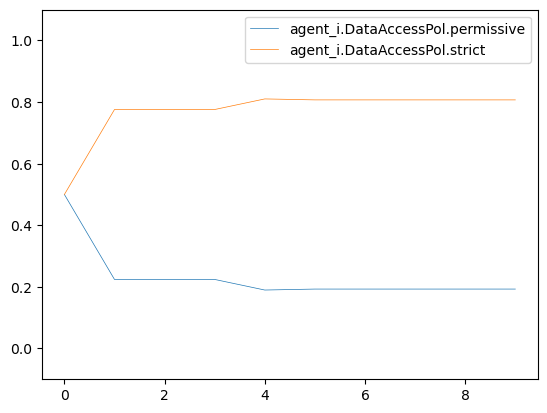

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.500000,0.500000,Nop,CheckSudo,none
2,0.324817,0.675182,Nop,PrivEsc,su_login
3,0.242627,0.757373,Nop,FileRecon,file_write
4,0.242627,0.757373,Nop,FileRecon,none
5,0.323004,0.676996,Nop,ManipulateData,file_enum
6,0.294677,0.705322,Nop,Nop,su_login
7,0.294571,0.705429,Nop,Nop,none
8,0.299633,0.700367,Nop,Nop,none
9,0.299799,0.700201,Nop,Nop,file_write


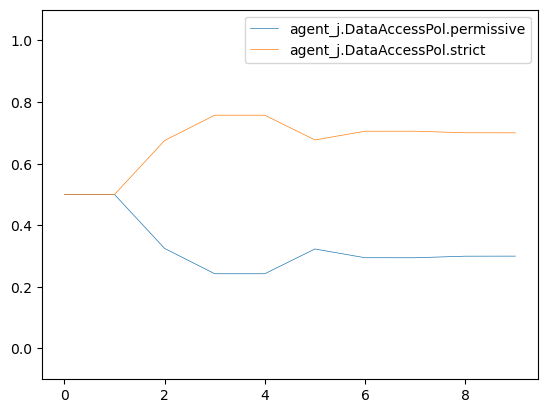

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,FileRecon,Nop
5,1.0,0.0,0.0,ManipulateData,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


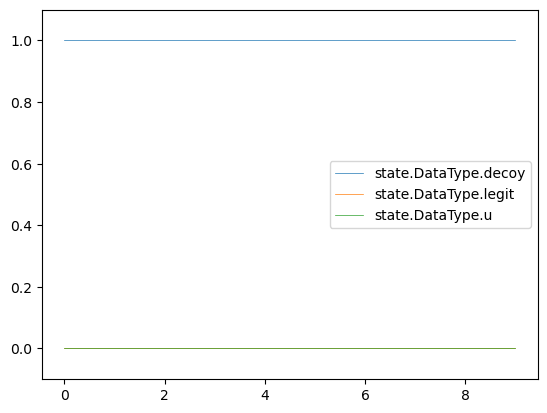

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,0.0,FileRecon,Nop,failure,active
1,0.500000,0.500000,0.0,CheckSudo,Nop,success,active
2,0.666667,0.333333,0.0,PrivEsc,Nop,success,active
3,0.666667,0.333333,0.0,FileRecon,Nop,failure,active
4,0.666667,0.333333,0.0,FileRecon,Nop,success,active
5,0.666667,0.333333,0.0,ManipulateData,Nop,failure,inactive
6,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
7,0.666667,0.333333,0.0,Nop,Nop,success,inactive
8,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
9,0.666667,0.333333,0.0,Nop,Nop,success,inactive


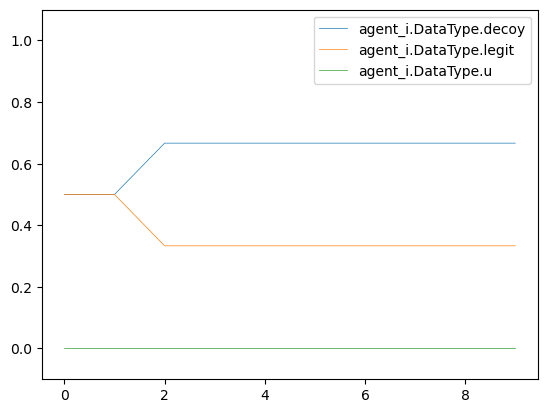

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_write
4,1.0,0.0,0.0,Nop,FileRecon,none
5,1.0,0.0,0.0,Nop,ManipulateData,file_enum
6,1.0,0.0,0.0,Nop,Nop,su_login
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,file_write


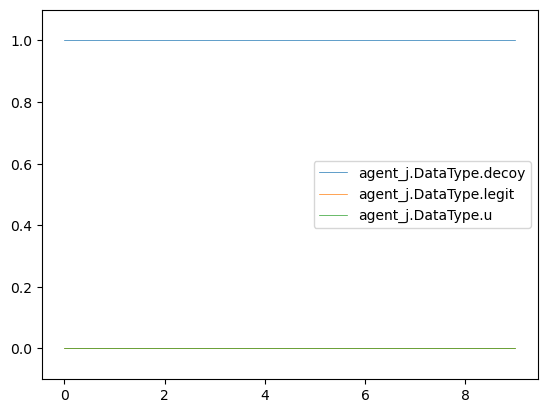

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,FileRecon,Nop
5,0.0,1.0,ManipulateData,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


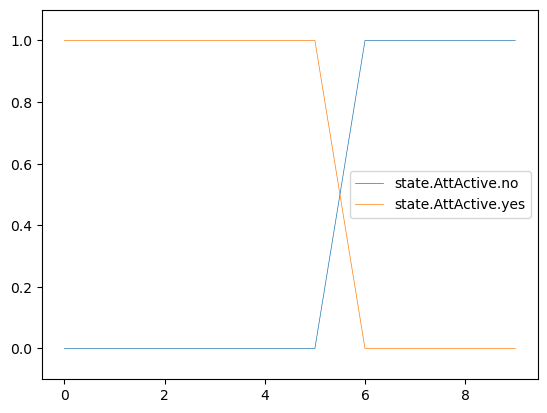

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,failure,active
4,0.0,1.0,FileRecon,Nop,success,active
5,0.0,1.0,ManipulateData,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,success,inactive


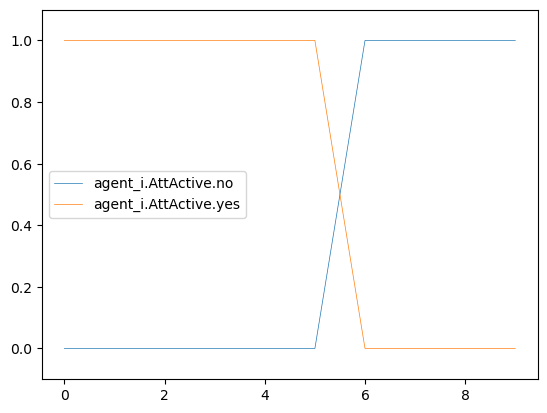

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.125000,0.875000,Nop,CheckSudo,none
2,0.182482,0.817518,Nop,PrivEsc,su_login
3,0.044786,0.955215,Nop,FileRecon,file_write
4,0.044786,0.955215,Nop,FileRecon,none
5,0.811726,0.188274,Nop,ManipulateData,file_enum
6,0.773696,0.226304,Nop,Nop,su_login
7,0.955340,0.044660,Nop,Nop,none
8,0.998624,0.001376,Nop,Nop,none
9,0.999957,0.000044,Nop,Nop,file_write


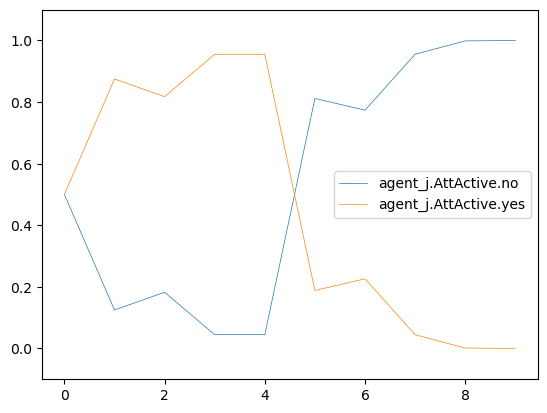

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,FileRecon,Nop
5,0.0,1.0,ManipulateData,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


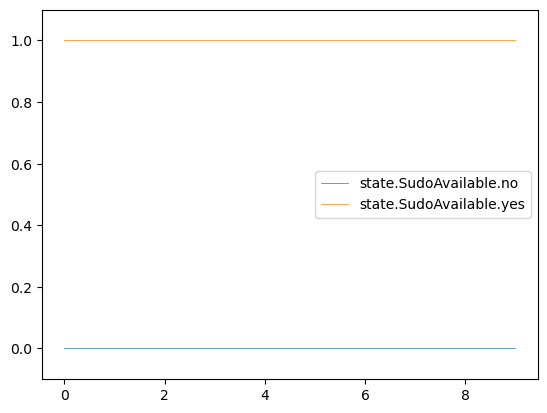

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,failure,active
1,0.5,0.5,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,failure,active
4,0.0,1.0,FileRecon,Nop,success,active
5,0.0,1.0,ManipulateData,Nop,failure,inactive
6,0.0,1.0,Nop,Nop,failure,inactive
7,0.0,1.0,Nop,Nop,success,inactive
8,0.0,1.0,Nop,Nop,failure,inactive
9,0.0,1.0,Nop,Nop,success,inactive


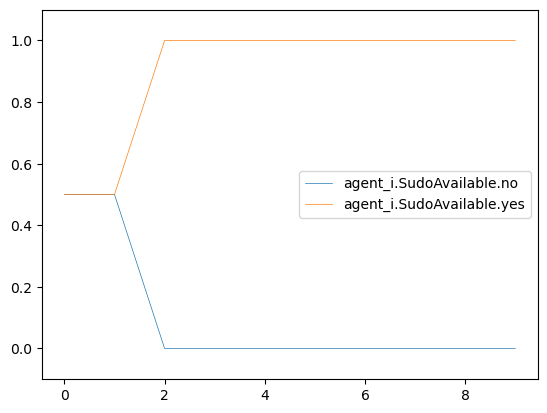

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,CheckSudo,none
2,0.0,1.0,Nop,PrivEsc,su_login
3,0.0,1.0,Nop,FileRecon,file_write
4,0.0,1.0,Nop,FileRecon,none
5,0.0,1.0,Nop,ManipulateData,file_enum
6,0.0,1.0,Nop,Nop,su_login
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,file_write


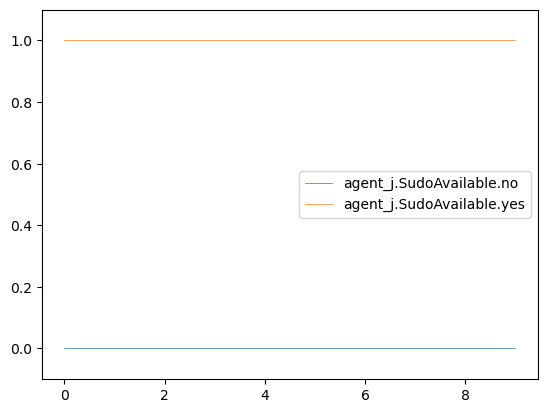

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,FileRecon,Nop
5,1.0,0.0,0.0,ManipulateData,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


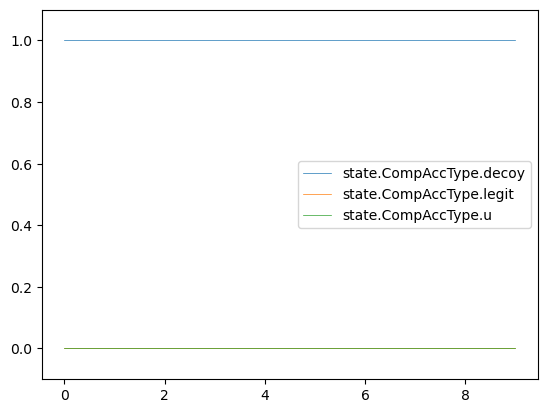

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,0.0,FileRecon,Nop,failure,active
1,0.5,0.5,0.0,CheckSudo,Nop,success,active
2,0.5,0.5,0.0,PrivEsc,Nop,success,active
3,0.5,0.5,0.0,FileRecon,Nop,failure,active
4,0.5,0.5,0.0,FileRecon,Nop,success,active
5,0.5,0.5,0.0,ManipulateData,Nop,failure,inactive
6,0.5,0.5,0.0,Nop,Nop,failure,inactive
7,0.5,0.5,0.0,Nop,Nop,success,inactive
8,0.5,0.5,0.0,Nop,Nop,failure,inactive
9,0.5,0.5,0.0,Nop,Nop,success,inactive


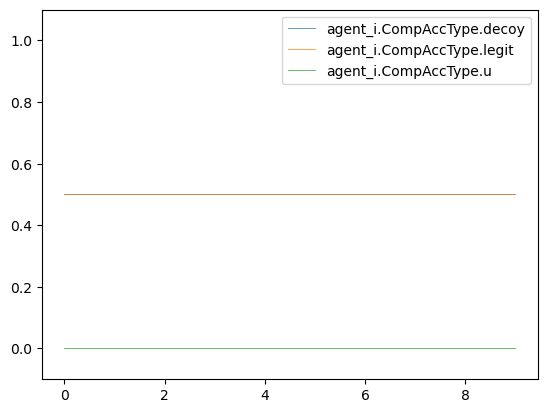

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,file_write
4,1.0,0.0,0.0,Nop,FileRecon,none
5,1.0,0.0,0.0,Nop,ManipulateData,file_enum
6,1.0,0.0,0.0,Nop,Nop,su_login
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,file_write


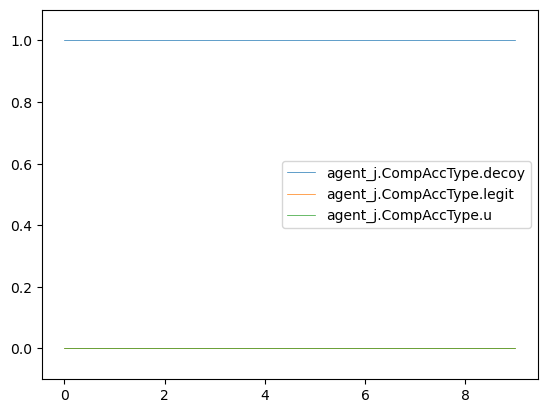

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,FileRecon,Nop
1,1.0,0.0,CheckSudo,Nop
2,1.0,0.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,FileRecon,Nop
5,0.0,1.0,ManipulateData,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


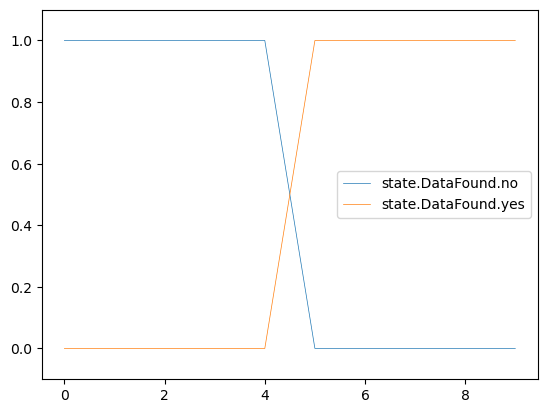

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,failure,active
1,0.931034,0.068966,CheckSudo,Nop,success,active
2,0.931035,0.068966,PrivEsc,Nop,success,active
3,0.931035,0.068966,FileRecon,Nop,failure,active
4,0.673130,0.326870,FileRecon,Nop,success,active
5,0.016992,0.983008,ManipulateData,Nop,failure,inactive
6,0.016992,0.983008,Nop,Nop,failure,inactive
7,0.016992,0.983008,Nop,Nop,success,inactive
8,0.016992,0.983008,Nop,Nop,failure,inactive
9,0.016992,0.983008,Nop,Nop,success,inactive


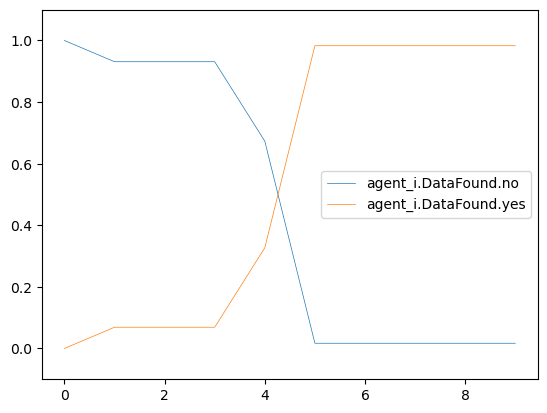

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,0.650000,0.350000,Nop,CheckSudo,none
2,0.881752,0.118248,Nop,PrivEsc,su_login
3,0.921936,0.078064,Nop,FileRecon,file_write
4,0.212551,0.787449,Nop,FileRecon,none
5,0.226198,0.773802,Nop,ManipulateData,file_enum
6,0.190039,0.809961,Nop,Nop,su_login
7,0.171141,0.828859,Nop,Nop,none
8,0.172583,0.827417,Nop,Nop,none
9,0.172604,0.827396,Nop,Nop,file_write


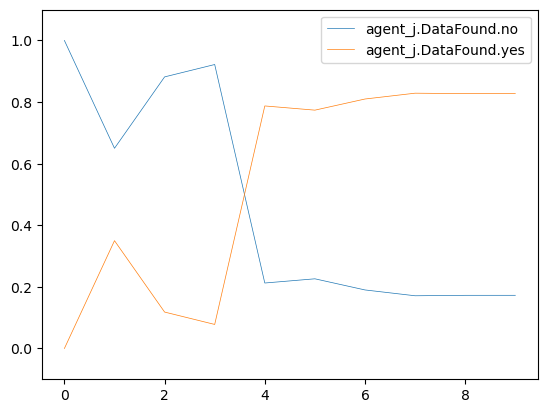

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,FileRecon,Nop
5,1.0,0.0,ManipulateData,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


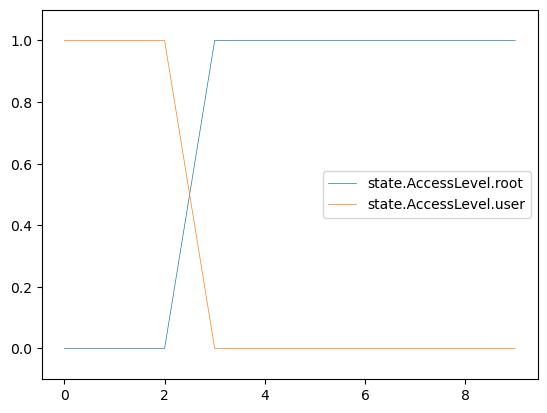

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,1.0,0.0,FileRecon,Nop,failure,active
4,1.0,0.0,FileRecon,Nop,success,active
5,1.0,0.0,ManipulateData,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,success,inactive


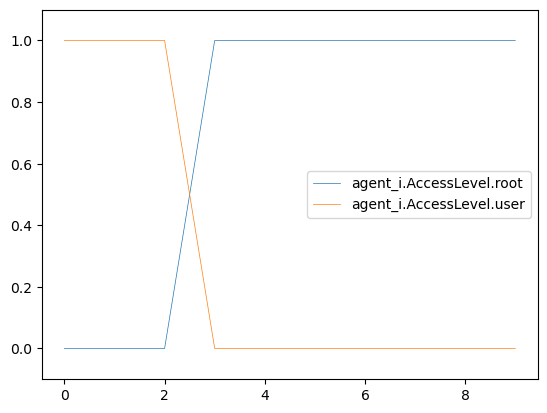

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,CheckSudo,none
2,0.000000,1.000000,Nop,PrivEsc,su_login
3,0.952413,0.047587,Nop,FileRecon,file_write
4,0.952413,0.047587,Nop,FileRecon,none
5,0.751871,0.248129,Nop,ManipulateData,file_enum
6,0.799535,0.200464,Nop,Nop,su_login
7,0.799723,0.200277,Nop,Nop,none
8,0.791803,0.208197,Nop,Nop,none
9,0.791619,0.208382,Nop,Nop,file_write


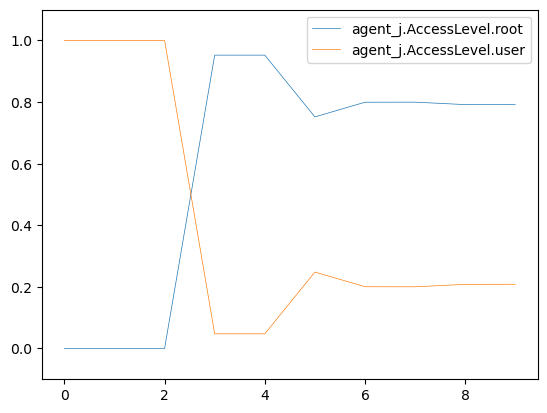

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,failure,active
1,0.500000,0.500000,success,active
2,0.333333,0.666667,success,active
3,0.333333,0.666667,success,active
4,0.333333,0.666667,success,inactive
5,0.333333,0.666667,failure,inactive
6,0.333333,0.666667,success,inactive
7,0.333333,0.666667,failure,inactive
8,0.333333,0.666667,failure,inactive
9,0.333333,0.666667,success,inactive


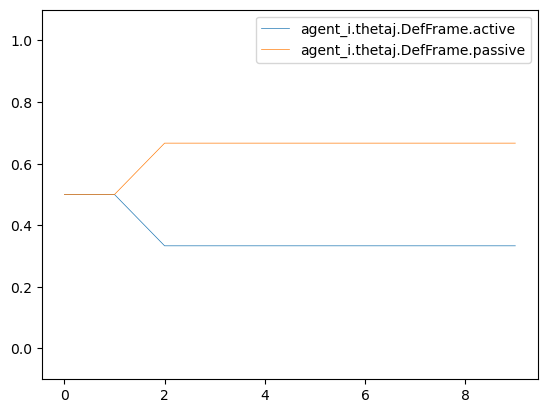

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,none
2,1.0,su_login
3,1.0,none
4,1.0,file_write
5,1.0,su_login
6,1.0,none
7,1.0,none
8,1.0,su_login
9,1.0,none


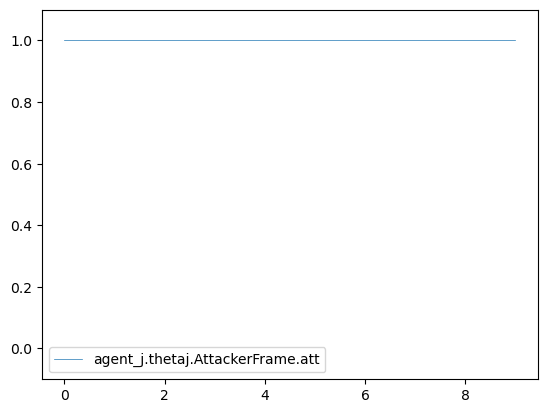

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


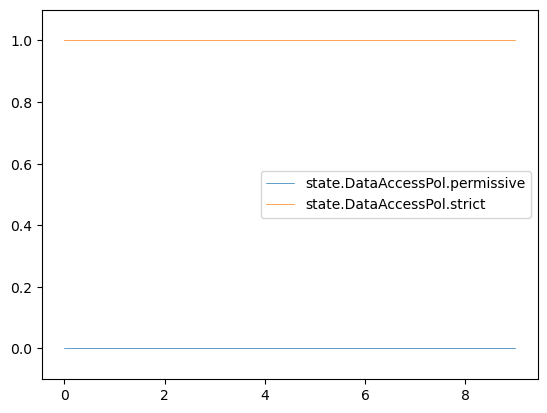

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,failure,active
1,0.224138,0.775862,CheckSudo,Nop,success,active
2,0.224138,0.775862,PrivEsc,Nop,success,active
3,0.224138,0.775862,FileRecon,Nop,success,active
4,0.235537,0.764463,ManipulateData,Nop,success,inactive
5,0.235537,0.764463,Nop,Nop,failure,inactive
6,0.235537,0.764463,Nop,Nop,success,inactive
7,0.235537,0.764463,Nop,Nop,failure,inactive
8,0.235537,0.764463,Nop,Nop,failure,inactive
9,0.235537,0.764463,Nop,Nop,success,inactive


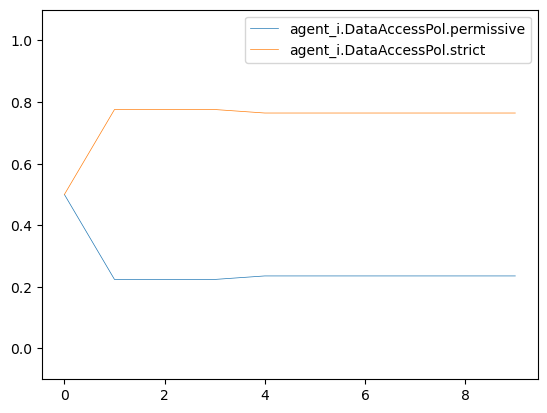

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.500000,0.500000,Nop,CheckSudo,none
2,0.324817,0.675182,Nop,PrivEsc,su_login
3,0.242627,0.757373,Nop,FileRecon,none
4,0.321387,0.678613,Nop,ManipulateData,file_write
5,0.256060,0.743940,Nop,Nop,su_login
6,0.256060,0.743940,Nop,Nop,none
7,0.256916,0.743084,Nop,Nop,none
8,0.256946,0.743054,Nop,Nop,su_login
9,0.256946,0.743054,Nop,Nop,none


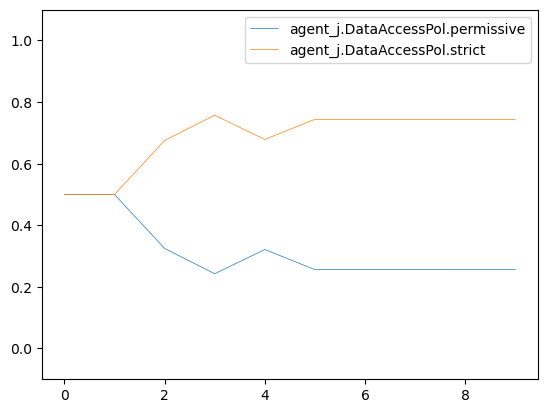

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


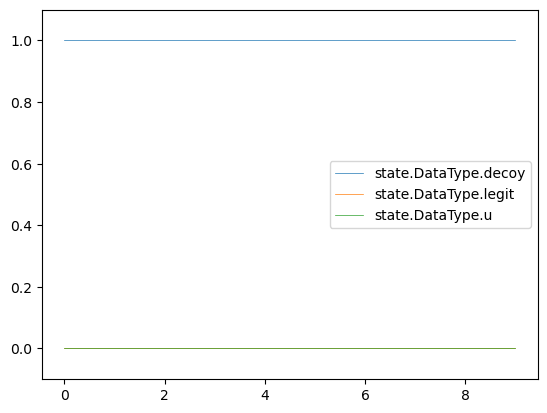

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,0.0,FileRecon,Nop,failure,active
1,0.500000,0.500000,0.0,CheckSudo,Nop,success,active
2,0.666667,0.333333,0.0,PrivEsc,Nop,success,active
3,0.666667,0.333333,0.0,FileRecon,Nop,success,active
4,0.666667,0.333333,0.0,ManipulateData,Nop,success,inactive
5,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
6,0.666667,0.333333,0.0,Nop,Nop,success,inactive
7,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
8,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
9,0.666667,0.333333,0.0,Nop,Nop,success,inactive


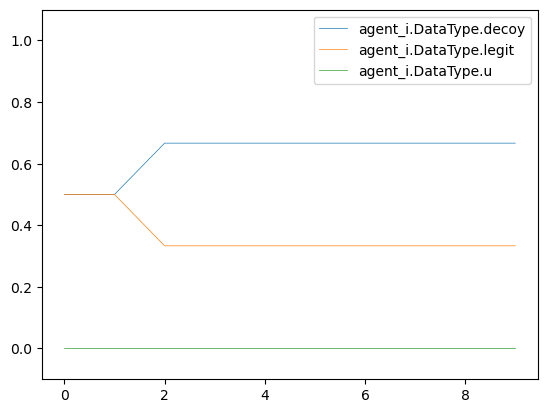

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,none
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,su_login
9,1.0,0.0,0.0,Nop,Nop,none


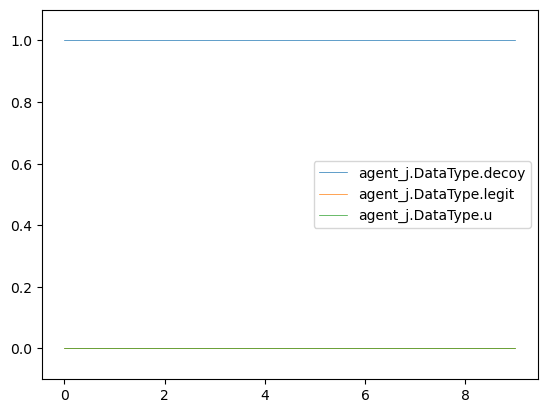

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


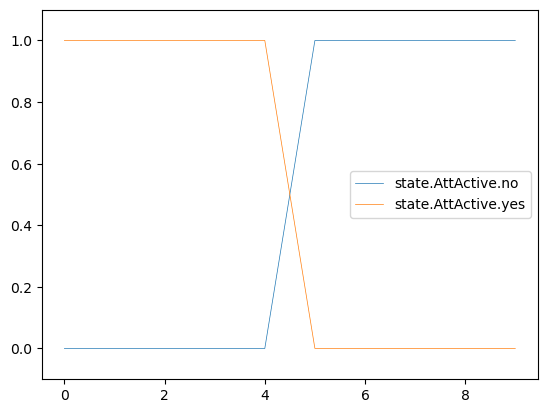

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,success,inactive
7,1.0,0.0,Nop,Nop,failure,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,success,inactive


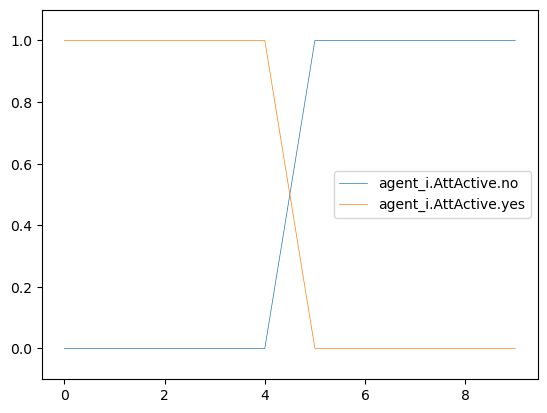

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.125000,0.875000,Nop,CheckSudo,none
2,0.182482,0.817518,Nop,PrivEsc,su_login
3,0.044786,0.955215,Nop,FileRecon,none
4,0.245364,0.754636,Nop,ManipulateData,file_write
5,0.955550,0.044450,Nop,Nop,su_login
6,0.989244,0.010756,Nop,Nop,none
7,0.999683,0.000317,Nop,Nop,none
8,0.999991,0.000009,Nop,Nop,su_login
9,0.999996,0.000004,Nop,Nop,none


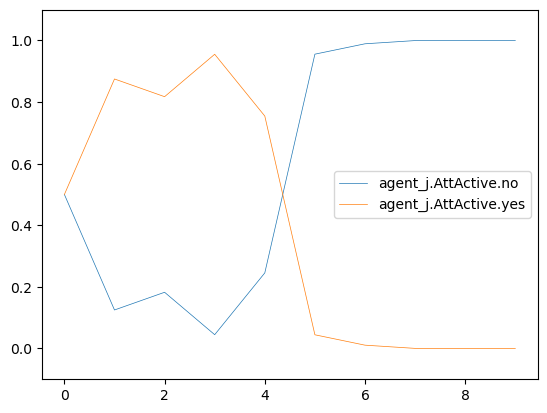

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


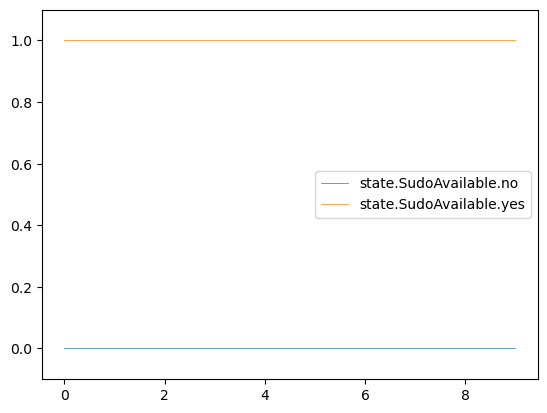

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,failure,active
1,0.5,0.5,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,0.0,1.0,Nop,Nop,failure,inactive
6,0.0,1.0,Nop,Nop,success,inactive
7,0.0,1.0,Nop,Nop,failure,inactive
8,0.0,1.0,Nop,Nop,failure,inactive
9,0.0,1.0,Nop,Nop,success,inactive


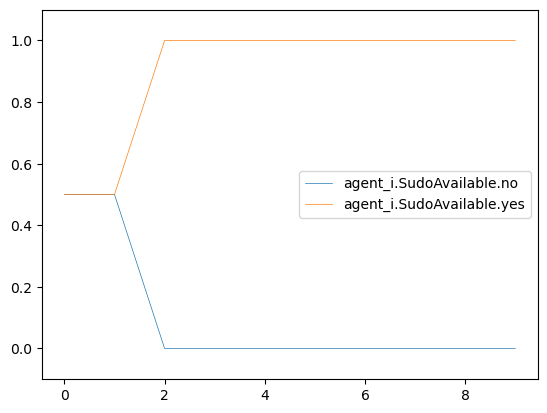

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,CheckSudo,none
2,0.0,1.0,Nop,PrivEsc,su_login
3,0.0,1.0,Nop,FileRecon,none
4,0.0,1.0,Nop,ManipulateData,file_write
5,0.0,1.0,Nop,Nop,su_login
6,0.0,1.0,Nop,Nop,none
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,su_login
9,0.0,1.0,Nop,Nop,none


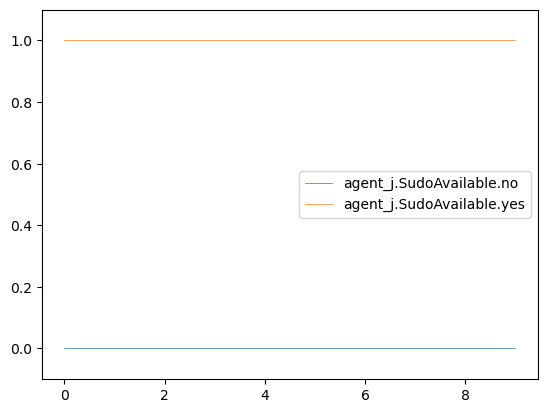

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


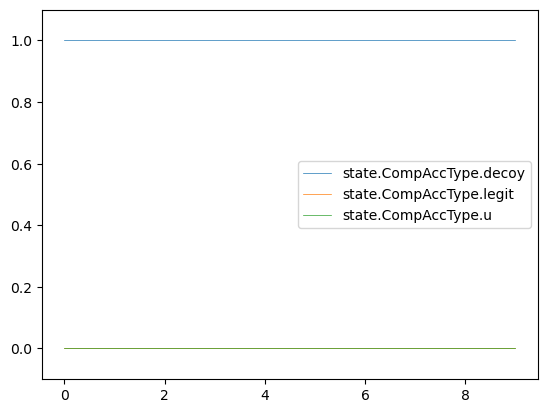

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,0.0,FileRecon,Nop,failure,active
1,0.5,0.5,0.0,CheckSudo,Nop,success,active
2,0.5,0.5,0.0,PrivEsc,Nop,success,active
3,0.5,0.5,0.0,FileRecon,Nop,success,active
4,0.5,0.5,0.0,ManipulateData,Nop,success,inactive
5,0.5,0.5,0.0,Nop,Nop,failure,inactive
6,0.5,0.5,0.0,Nop,Nop,success,inactive
7,0.5,0.5,0.0,Nop,Nop,failure,inactive
8,0.5,0.5,0.0,Nop,Nop,failure,inactive
9,0.5,0.5,0.0,Nop,Nop,success,inactive


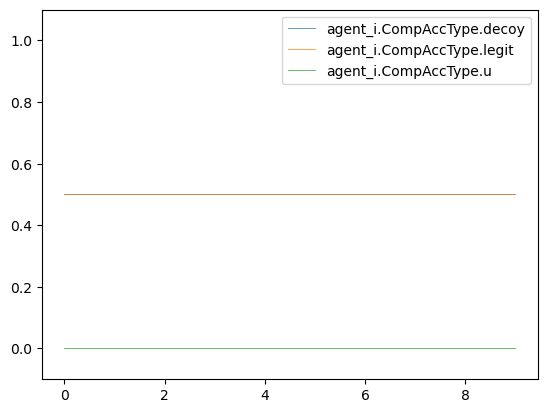

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,none
2,1.0,0.0,0.0,Nop,PrivEsc,su_login
3,1.0,0.0,0.0,Nop,FileRecon,none
4,1.0,0.0,0.0,Nop,ManipulateData,file_write
5,1.0,0.0,0.0,Nop,Nop,su_login
6,1.0,0.0,0.0,Nop,Nop,none
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,su_login
9,1.0,0.0,0.0,Nop,Nop,none


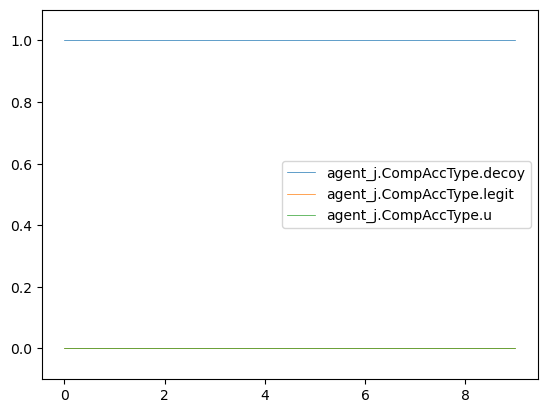

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,FileRecon,Nop
1,1.0,0.0,CheckSudo,Nop
2,1.0,0.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


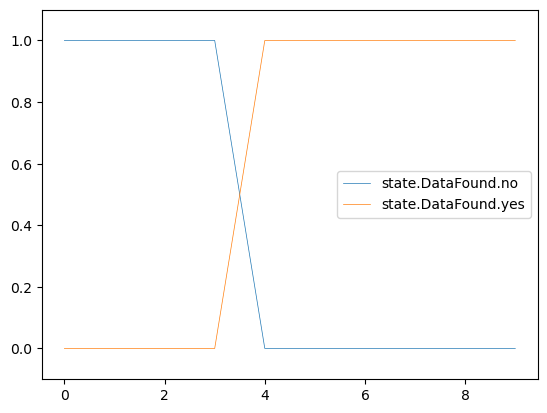

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,failure,active
1,0.931034,0.068966,CheckSudo,Nop,success,active
2,0.931035,0.068966,PrivEsc,Nop,success,active
3,0.931035,0.068966,FileRecon,Nop,success,active
4,0.024793,0.975207,ManipulateData,Nop,success,inactive
5,0.024793,0.975207,Nop,Nop,failure,inactive
6,0.024793,0.975207,Nop,Nop,success,inactive
7,0.024793,0.975207,Nop,Nop,failure,inactive
8,0.024793,0.975207,Nop,Nop,failure,inactive
9,0.024793,0.975207,Nop,Nop,success,inactive


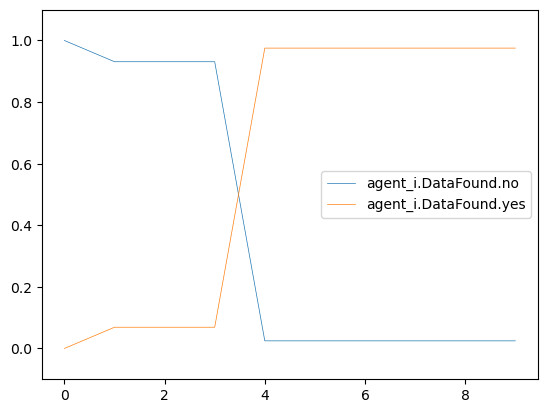

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,0.650000,0.350000,Nop,CheckSudo,none
2,0.881752,0.118248,Nop,PrivEsc,su_login
3,0.921936,0.078064,Nop,FileRecon,none
4,0.330970,0.669030,Nop,ManipulateData,file_write
5,0.072041,0.927959,Nop,Nop,su_login
6,0.066545,0.933455,Nop,Nop,none
7,0.065812,0.934188,Nop,Nop,none
8,0.065793,0.934207,Nop,Nop,su_login
9,0.065793,0.934207,Nop,Nop,none


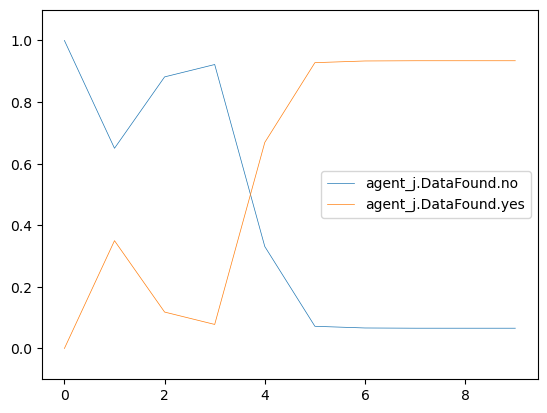

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


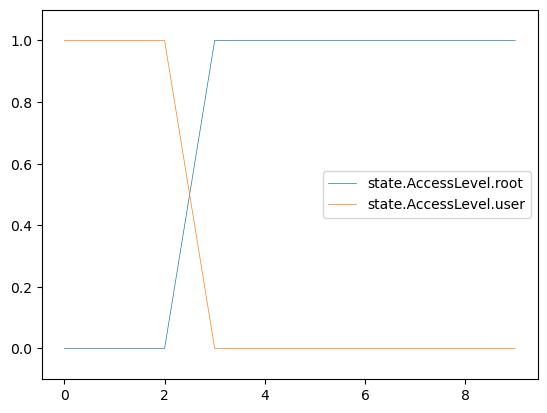

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,1.0,0.0,FileRecon,Nop,success,active
4,1.0,0.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,success,inactive
7,1.0,0.0,Nop,Nop,failure,inactive
8,1.0,0.0,Nop,Nop,failure,inactive
9,1.0,0.0,Nop,Nop,success,inactive


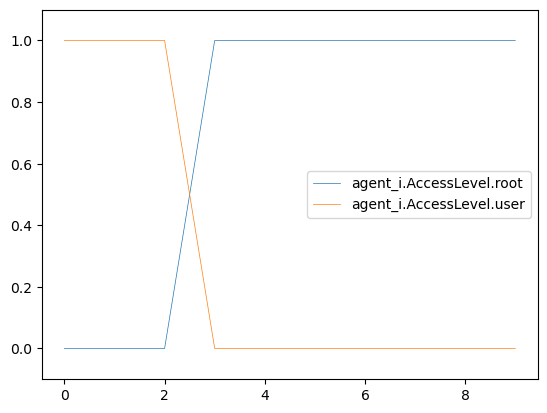

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,CheckSudo,none
2,0.000000,1.000000,Nop,PrivEsc,su_login
3,0.952413,0.047587,Nop,FileRecon,none
4,0.745417,0.254583,Nop,ManipulateData,file_write
5,0.942407,0.057593,Nop,Nop,su_login
6,0.942407,0.057593,Nop,Nop,none
7,0.941913,0.058087,Nop,Nop,none
8,0.941898,0.058102,Nop,Nop,su_login
9,0.941898,0.058102,Nop,Nop,none


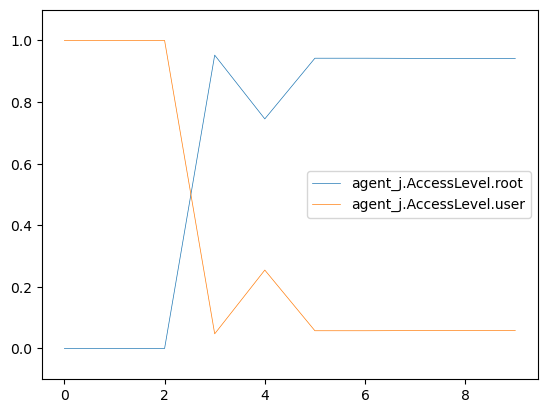

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


,agent_i.thetaj.DefFrame.active,agent_i.thetaj.DefFrame.passive,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,failure,active
1,0.500000,0.500000,success,active
2,0.333333,0.666667,success,active
3,0.333333,0.666667,success,active
4,0.333333,0.666667,success,inactive
5,0.333333,0.666667,failure,inactive
6,0.333333,0.666667,failure,inactive
7,0.333333,0.666667,success,inactive
8,0.333333,0.666667,success,inactive
9,0.333333,0.666667,success,inactive


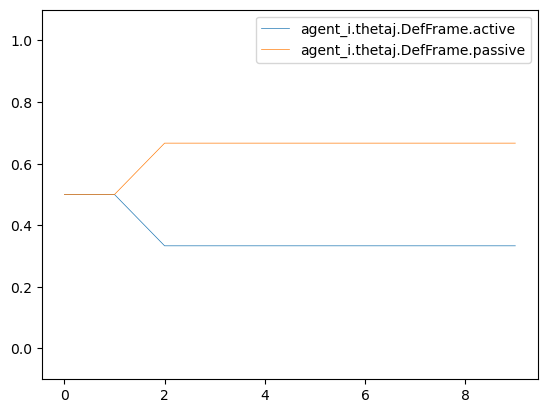

,agent_j.thetaj.AttackerFrame.att,agent_j.observation.EndPtAlerts'
0,1.0,file_enum
1,1.0,su_login
2,1.0,file_enum
3,1.0,file_enum
4,1.0,none
5,1.0,file_enum
6,1.0,file_enum
7,1.0,none
8,1.0,none
9,1.0,none


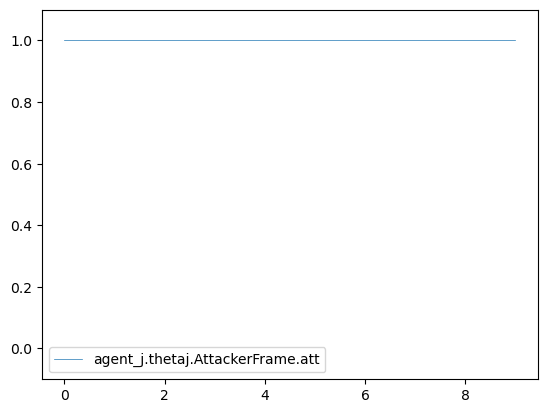

=============DataAccessPol============


,state.DataAccessPol.permissive,state.DataAccessPol.strict,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


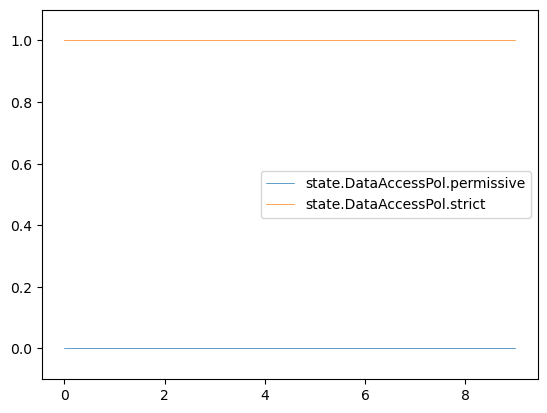

,agent_i.DataAccessPol.permissive,agent_i.DataAccessPol.strict,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,FileRecon,Nop,failure,active
1,0.224138,0.775862,CheckSudo,Nop,success,active
2,0.224138,0.775862,PrivEsc,Nop,success,active
3,0.224138,0.775862,FileRecon,Nop,success,active
4,0.235537,0.764463,ManipulateData,Nop,success,inactive
5,0.235537,0.764463,Nop,Nop,failure,inactive
6,0.235537,0.764463,Nop,Nop,failure,inactive
7,0.235537,0.764463,Nop,Nop,success,inactive
8,0.235537,0.764463,Nop,Nop,success,inactive
9,0.235537,0.764463,Nop,Nop,success,inactive


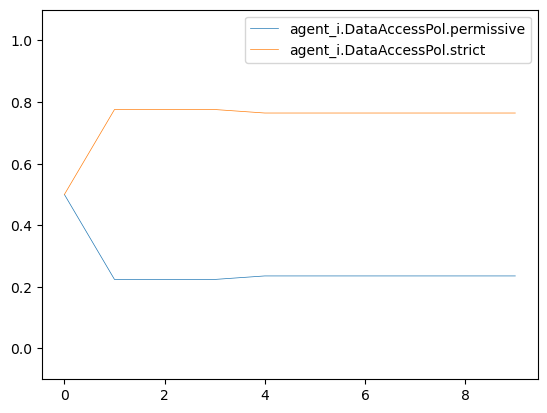

,agent_j.DataAccessPol.permissive,agent_j.DataAccessPol.strict,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.500000,0.500000,Nop,CheckSudo,su_login
2,0.500000,0.500000,Nop,PrivEsc,file_enum
3,0.488324,0.511676,Nop,FileRecon,file_enum
4,0.448198,0.551803,Nop,ManipulateData,none
5,0.565275,0.434725,Nop,Nop,file_enum
6,0.489610,0.510390,Nop,Nop,file_enum
7,0.388883,0.611117,Nop,Nop,none
8,0.473581,0.526419,Nop,Nop,none
9,0.497047,0.502953,Nop,Nop,none


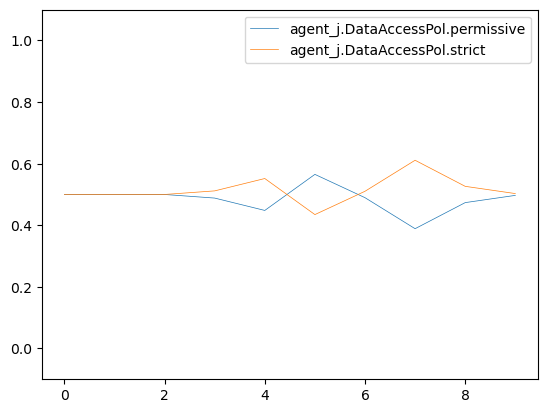

=============DataType============


,state.DataType.decoy,state.DataType.legit,state.DataType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


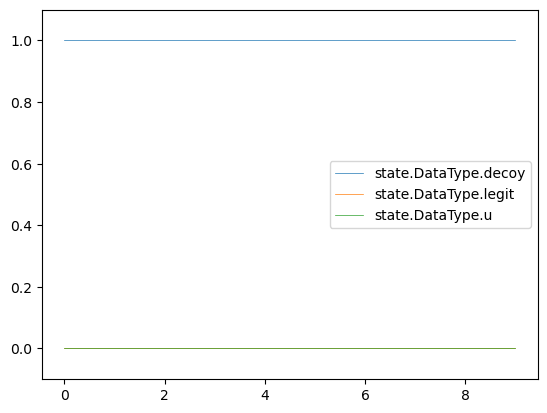

,agent_i.DataType.decoy,agent_i.DataType.legit,agent_i.DataType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.500000,0.500000,0.0,FileRecon,Nop,failure,active
1,0.500000,0.500000,0.0,CheckSudo,Nop,success,active
2,0.666667,0.333333,0.0,PrivEsc,Nop,success,active
3,0.666667,0.333333,0.0,FileRecon,Nop,success,active
4,0.666667,0.333333,0.0,ManipulateData,Nop,success,inactive
5,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
6,0.666667,0.333333,0.0,Nop,Nop,failure,inactive
7,0.666667,0.333333,0.0,Nop,Nop,success,inactive
8,0.666667,0.333333,0.0,Nop,Nop,success,inactive
9,0.666667,0.333333,0.0,Nop,Nop,success,inactive


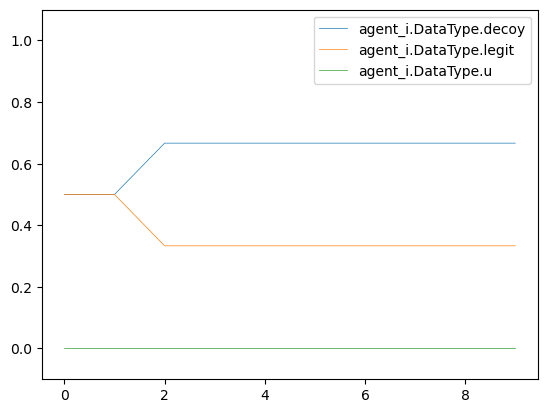

,agent_j.DataType.decoy,agent_j.DataType.legit,agent_j.DataType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,su_login
2,1.0,0.0,0.0,Nop,PrivEsc,file_enum
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,none
5,1.0,0.0,0.0,Nop,Nop,file_enum
6,1.0,0.0,0.0,Nop,Nop,file_enum
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


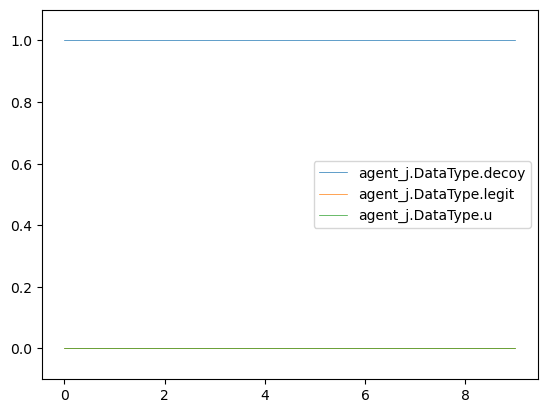

=============AttActive============


,state.AttActive.no,state.AttActive.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


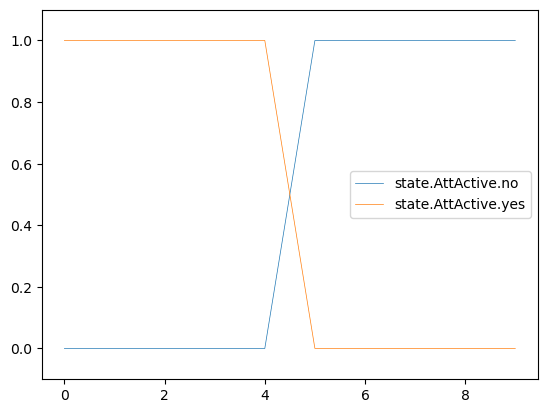

,agent_i.AttActive.no,agent_i.AttActive.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,success,inactive
9,1.0,0.0,Nop,Nop,success,inactive


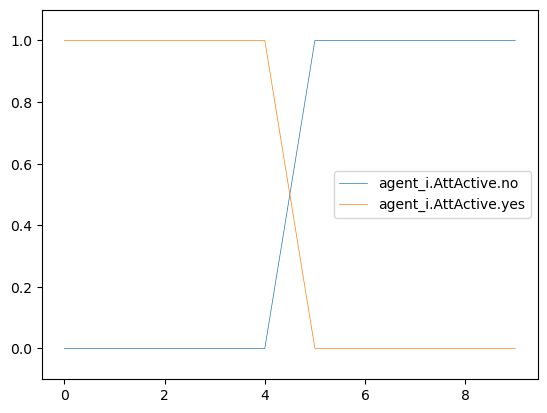

,agent_j.AttActive.no,agent_j.AttActive.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.500000,0.500000,Nop,FileRecon,file_enum
1,0.125000,0.875000,Nop,CheckSudo,su_login
2,0.125000,0.875000,Nop,PrivEsc,file_enum
3,0.291438,0.708562,Nop,FileRecon,file_enum
4,0.070891,0.929109,Nop,ManipulateData,none
5,0.824524,0.175476,Nop,Nop,file_enum
6,0.633639,0.366361,Nop,Nop,file_enum
7,0.623591,0.376409,Nop,Nop,none
8,0.919084,0.080916,Nop,Nop,none
9,0.990162,0.009838,Nop,Nop,none


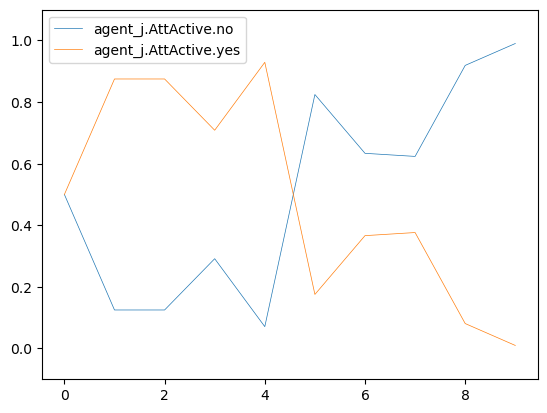

=============SudoAvailable============


,state.SudoAvailable.no,state.SudoAvailable.yes,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,0.0,1.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


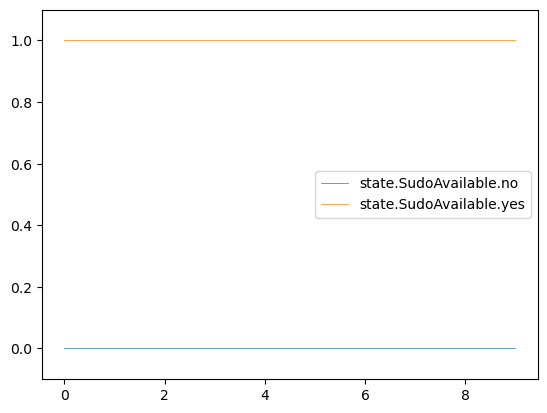

,agent_i.SudoAvailable.no,agent_i.SudoAvailable.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,FileRecon,Nop,failure,active
1,0.5,0.5,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,0.0,1.0,FileRecon,Nop,success,active
4,0.0,1.0,ManipulateData,Nop,success,inactive
5,0.0,1.0,Nop,Nop,failure,inactive
6,0.0,1.0,Nop,Nop,failure,inactive
7,0.0,1.0,Nop,Nop,success,inactive
8,0.0,1.0,Nop,Nop,success,inactive
9,0.0,1.0,Nop,Nop,success,inactive


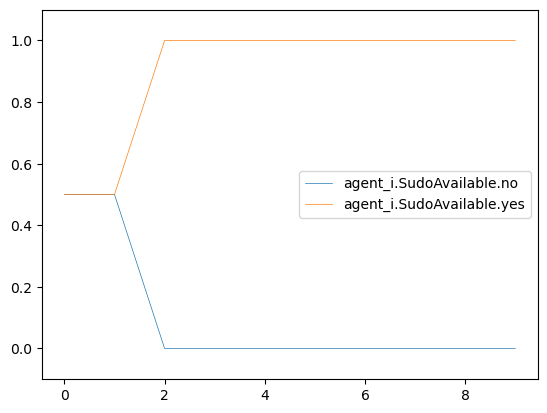

,agent_j.SudoAvailable.no,agent_j.SudoAvailable.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.0,1.0,Nop,FileRecon,file_enum
1,0.0,1.0,Nop,CheckSudo,su_login
2,0.0,1.0,Nop,PrivEsc,file_enum
3,0.0,1.0,Nop,FileRecon,file_enum
4,0.0,1.0,Nop,ManipulateData,none
5,0.0,1.0,Nop,Nop,file_enum
6,0.0,1.0,Nop,Nop,file_enum
7,0.0,1.0,Nop,Nop,none
8,0.0,1.0,Nop,Nop,none
9,0.0,1.0,Nop,Nop,none


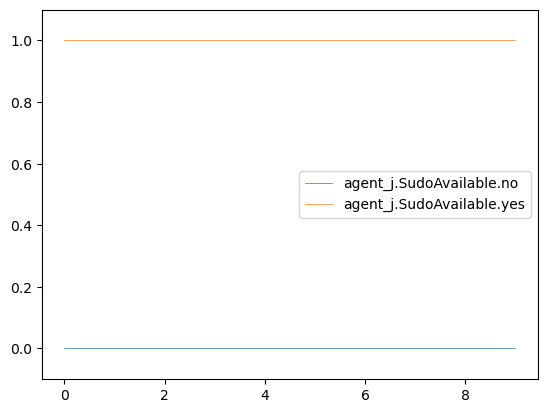

=============CompAccType============


,state.CompAccType.decoy,state.CompAccType.legit,state.CompAccType.u,agent_i.action,agent_j.action
0,1.0,0.0,0.0,FileRecon,Nop
1,1.0,0.0,0.0,CheckSudo,Nop
2,1.0,0.0,0.0,PrivEsc,Nop
3,1.0,0.0,0.0,FileRecon,Nop
4,1.0,0.0,0.0,ManipulateData,Nop
5,1.0,0.0,0.0,Nop,Nop
6,1.0,0.0,0.0,Nop,Nop
7,1.0,0.0,0.0,Nop,Nop
8,1.0,0.0,0.0,Nop,Nop
9,1.0,0.0,0.0,Nop,Nop


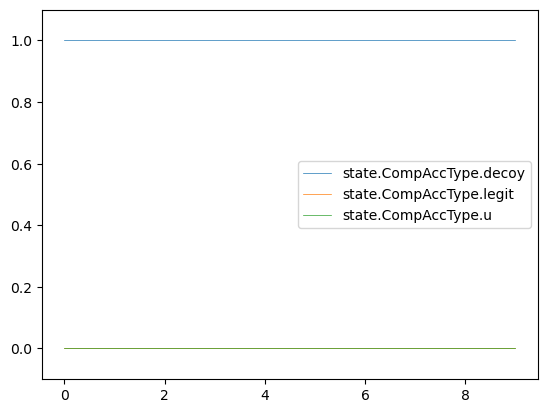

,agent_i.CompAccType.decoy,agent_i.CompAccType.legit,agent_i.CompAccType.u,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.5,0.5,0.0,FileRecon,Nop,failure,active
1,0.5,0.5,0.0,CheckSudo,Nop,success,active
2,0.5,0.5,0.0,PrivEsc,Nop,success,active
3,0.5,0.5,0.0,FileRecon,Nop,success,active
4,0.5,0.5,0.0,ManipulateData,Nop,success,inactive
5,0.5,0.5,0.0,Nop,Nop,failure,inactive
6,0.5,0.5,0.0,Nop,Nop,failure,inactive
7,0.5,0.5,0.0,Nop,Nop,success,inactive
8,0.5,0.5,0.0,Nop,Nop,success,inactive
9,0.5,0.5,0.0,Nop,Nop,success,inactive


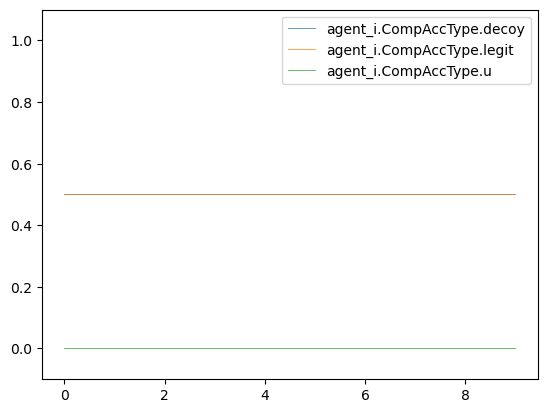

,agent_j.CompAccType.decoy,agent_j.CompAccType.legit,agent_j.CompAccType.u,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.0,0.0,0.0,Nop,FileRecon,file_enum
1,1.0,0.0,0.0,Nop,CheckSudo,su_login
2,1.0,0.0,0.0,Nop,PrivEsc,file_enum
3,1.0,0.0,0.0,Nop,FileRecon,file_enum
4,1.0,0.0,0.0,Nop,ManipulateData,none
5,1.0,0.0,0.0,Nop,Nop,file_enum
6,1.0,0.0,0.0,Nop,Nop,file_enum
7,1.0,0.0,0.0,Nop,Nop,none
8,1.0,0.0,0.0,Nop,Nop,none
9,1.0,0.0,0.0,Nop,Nop,none


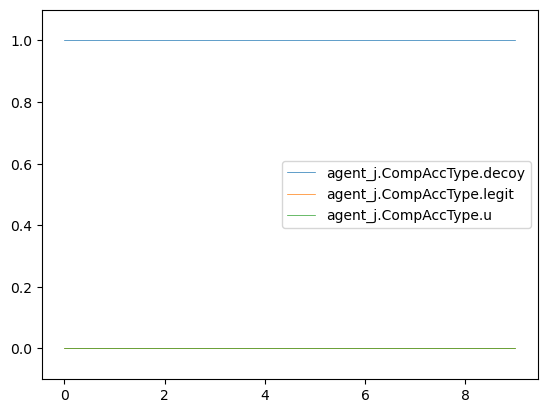

=============DataFound============


,state.DataFound.no,state.DataFound.yes,agent_i.action,agent_j.action
0,1.0,0.0,FileRecon,Nop
1,1.0,0.0,CheckSudo,Nop
2,1.0,0.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,0.0,1.0,ManipulateData,Nop
5,0.0,1.0,Nop,Nop
6,0.0,1.0,Nop,Nop
7,0.0,1.0,Nop,Nop
8,0.0,1.0,Nop,Nop
9,0.0,1.0,Nop,Nop


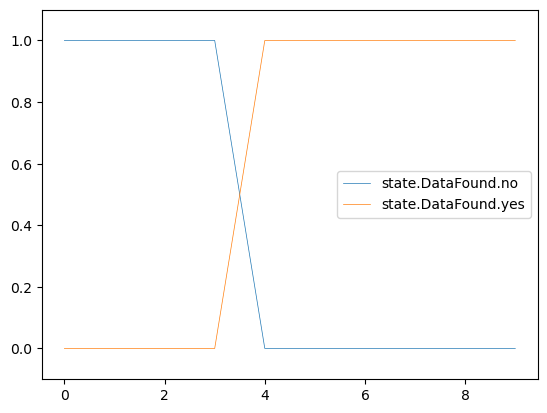

,agent_i.DataFound.no,agent_i.DataFound.yes,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,1.000000,0.000000,FileRecon,Nop,failure,active
1,0.931034,0.068966,CheckSudo,Nop,success,active
2,0.931035,0.068966,PrivEsc,Nop,success,active
3,0.931035,0.068966,FileRecon,Nop,success,active
4,0.024793,0.975207,ManipulateData,Nop,success,inactive
5,0.024793,0.975207,Nop,Nop,failure,inactive
6,0.024793,0.975207,Nop,Nop,failure,inactive
7,0.024793,0.975207,Nop,Nop,success,inactive
8,0.024793,0.975207,Nop,Nop,success,inactive
9,0.024793,0.975207,Nop,Nop,success,inactive


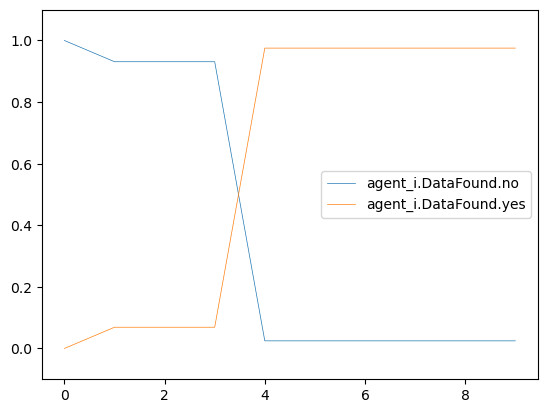

,agent_j.DataFound.no,agent_j.DataFound.yes,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,1.000000,0.000000,Nop,FileRecon,file_enum
1,0.650000,0.350000,Nop,CheckSudo,su_login
2,0.643000,0.357000,Nop,PrivEsc,file_enum
3,0.611495,0.388505,Nop,FileRecon,file_enum
4,0.208667,0.791334,Nop,ManipulateData,none
5,0.182072,0.817928,Nop,Nop,file_enum
6,0.147566,0.852434,Nop,Nop,file_enum
7,0.148672,0.851328,Nop,Nop,none
8,0.142812,0.857187,Nop,Nop,none
9,0.100490,0.899510,Nop,Nop,none


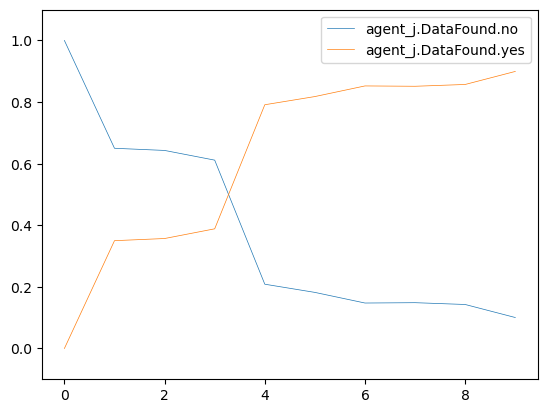

=============AccessLevel============


,state.AccessLevel.root,state.AccessLevel.user,agent_i.action,agent_j.action
0,0.0,1.0,FileRecon,Nop
1,0.0,1.0,CheckSudo,Nop
2,0.0,1.0,PrivEsc,Nop
3,1.0,0.0,FileRecon,Nop
4,1.0,0.0,ManipulateData,Nop
5,1.0,0.0,Nop,Nop
6,1.0,0.0,Nop,Nop
7,1.0,0.0,Nop,Nop
8,1.0,0.0,Nop,Nop
9,1.0,0.0,Nop,Nop


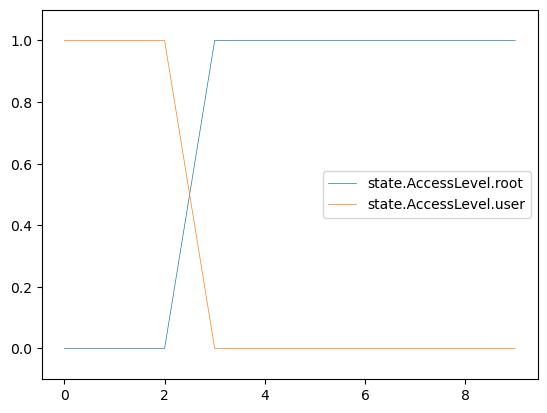

,agent_i.AccessLevel.root,agent_i.AccessLevel.user,agent_i.action,agent_j.action,agent_i.observation.ActionResult',agent_i.observation.ConnObs'
0,0.0,1.0,FileRecon,Nop,failure,active
1,0.0,1.0,CheckSudo,Nop,success,active
2,0.0,1.0,PrivEsc,Nop,success,active
3,1.0,0.0,FileRecon,Nop,success,active
4,1.0,0.0,ManipulateData,Nop,success,inactive
5,1.0,0.0,Nop,Nop,failure,inactive
6,1.0,0.0,Nop,Nop,failure,inactive
7,1.0,0.0,Nop,Nop,success,inactive
8,1.0,0.0,Nop,Nop,success,inactive
9,1.0,0.0,Nop,Nop,success,inactive


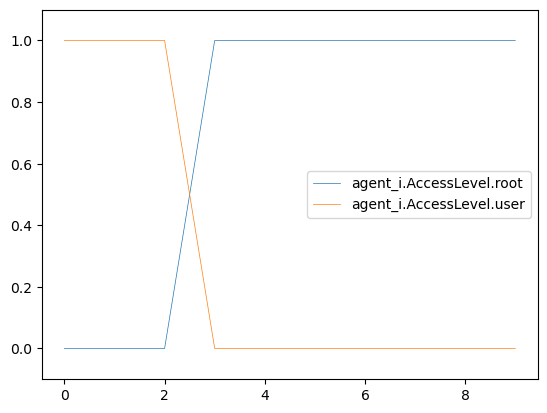

,agent_j.AccessLevel.root,agent_j.AccessLevel.user,agent_j.action,agent_i.action,agent_j.observation.EndPtAlerts'
0,0.000000,1.000000,Nop,FileRecon,file_enum
1,0.000000,1.000000,Nop,CheckSudo,su_login
2,0.000000,1.000000,Nop,PrivEsc,file_enum
3,0.352700,0.647300,Nop,FileRecon,file_enum
4,0.600553,0.399448,Nop,ManipulateData,none
5,0.453772,0.546228,Nop,Nop,file_enum
6,0.543907,0.456093,Nop,Nop,file_enum
7,0.627966,0.372034,Nop,Nop,none
8,0.524229,0.475771,Nop,Nop,none
9,0.560168,0.439832,Nop,Nop,none


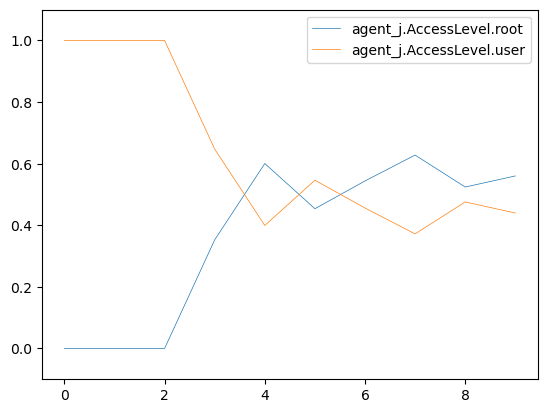

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    